# Setup

In [1]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
!pip install -U scikit-multiflow
#resource for profanity: https://pypi.org/project/profanity-check/
!pip install alt-profanity-check
!pip install sklearn --upgrade
#resource for sentiment: https://realpython.com/python-nltk-sentiment-analysis/#using-nltks-pre-trained-sentiment-analyzer
!pip install nltk
from profanity_check import predict
import nltk
nltk.download([
"names",
"stopwords",
"state_union",
"twitter_samples",
"movie_reviews",
"averaged_perceptron_tagger",
"vader_lexicon",
"punkt"])
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib
%matplotlib notebook
#from google.colab import drive
#drive.mount('/content/drive')

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package names to
[nltk_data]     C:\Users\aztec\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aztec\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\aztec\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[

# Dataset Fixing and Modifying

In [2]:
#had to edit first row of csv file so that file was read with 3 columns and not 1
tweets = pd.read_csv("../hatespeech_text_label_vote_RESTRICTED_100K_v2.csv")
tweets

,Tweet text Label Votes for the majority label,Unnamed: 1,Unnamed: 2
0,Beats by Dr. Dre urBeats Wired In-Ear Headphon...,spam,4
1,RT @Papapishu: Man it would fucking rule if we...,abusive,4
2,It is time to draw close to Him &#128591;&#127...,normal,4
3,if you notice me start to act different or dis...,normal,5
4,"Forget unfollowers, I believe in growing. 7 ne...",normal,3
...,...,...,...
99991,RT @shangros: my fucking queen https://t.co/wa...,abusive,5
99992,#Osteporosis treated with #PEMF - rebuild bone...,normal,3
99993,@LGUSAMobile why does my phone screen keeps fl...,normal,3
99994,#bigdata vs. #reality ... but equally applies ...,normal,5


In [3]:
#had to fix dataframe column names
tweets = tweets.rename(columns={"Tweet text  Label   Votes for the majority label": "Tweet text", "Unnamed: 1": "Label", "Unnamed: 2": "Votes for the majority label"})
#last column not needed
tweets.drop(tweets.columns[[2]], axis=1, inplace=True)
tweets

,Tweet text,Label
0,Beats by Dr. Dre urBeats Wired In-Ear Headphon...,spam
1,RT @Papapishu: Man it would fucking rule if we...,abusive
2,It is time to draw close to Him &#128591;&#127...,normal
3,if you notice me start to act different or dis...,normal
4,"Forget unfollowers, I believe in growing. 7 ne...",normal
...,...,...
99991,RT @shangros: my fucking queen https://t.co/wa...,abusive
99992,#Osteporosis treated with #PEMF - rebuild bone...,normal
99993,@LGUSAMobile why does my phone screen keeps fl...,normal
99994,#bigdata vs. #reality ... but equally applies ...,normal


In [4]:
#"spam" labels not needed
tweets = tweets[tweets['Label'] != "spam"]
tweets

,Tweet text,Label
1,RT @Papapishu: Man it would fucking rule if we...,abusive
2,It is time to draw close to Him &#128591;&#127...,normal
3,if you notice me start to act different or dis...,normal
4,"Forget unfollowers, I believe in growing. 7 ne...",normal
5,RT @Vitiligoprince: Hate Being sexually Frustr...,abusive
...,...,...
99991,RT @shangros: my fucking queen https://t.co/wa...,abusive
99992,#Osteporosis treated with #PEMF - rebuild bone...,normal
99993,@LGUSAMobile why does my phone screen keeps fl...,normal
99994,#bigdata vs. #reality ... but equally applies ...,normal


In [5]:
#check to make sure spam labels dropped
pd.unique(tweets['Label'])

array(['abusive', 'normal', 'hateful'], dtype=object)

# Tweet Feature Extraction And Data Cleaning/Processing

In [6]:
tweets["@ count"] = tweets['Tweet text'].str.count('@')
#Remove @'s from tweet text
tweets['Tweet text'] = tweets['Tweet text'].str.replace('@[\S]*', '')

tweets['Hashtag count'] = tweets['Tweet text'].str.count('#')
#Remove #'s from tweet text
tweets['Tweet text'] = tweets['Tweet text'].str.replace('#[\S]*','')

tweets['Retweet'] = tweets['Tweet text'].str.contains('RT')
#Remove RT's from tweet text
tweets['Tweet text'] = tweets['Tweet text'].str.replace('RT', '')

tweets['Url count'] = tweets['Tweet text'].str.count('http[\S]*')
#Remove URL's from tweet text
tweets['Tweet text'] = tweets['Tweet text'].str.replace('http[\S]*','')

tweets['Uppercase word count'] = tweets['Tweet text'].apply(lambda x: sum(map(str.isupper, x.split())))

tweets['Num sentences'] = tweets['Tweet text'].apply(lambda x: len(nltk.sent_tokenize(x)))

tweets['temp'] = tweets['Tweet text'].apply(lambda x: nltk.sent_tokenize(x))
tweets['Avg sentence len'] = tweets['temp'].apply(lambda x: pd.Series(x).apply(lambda y: len(nltk.word_tokenize(y))).mean())
tweets.drop(tweets.columns[[8]], axis=1, inplace=True)

#Got rid of tweets with no text information after data cleaning/processing
tweets['Text empty'] = tweets['Tweet text'].apply(lambda x: x.isspace())
tweets = tweets[tweets['Text empty'] != True]
tweets.drop(tweets.columns[[9]], axis=1, inplace=True)
tweets['Text empty'] = tweets['Tweet text'].apply(lambda x: len(x) == 0)
tweets = tweets[tweets['Text empty'] != True]
tweets.drop(tweets.columns[[9]], axis=1, inplace=True)

<ipython-input-6-c2e6dfa1edf4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets["@ count"] = tweets['Tweet text'].str.count('@')
<ipython-input-6-c2e6dfa1edf4>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets['Tweet text'] = tweets['Tweet text'].str.replace('@[\S]*', '')
<ipython-input-6-c2e6dfa1edf4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['Tweet text'] = tweets['Tweet text'].str.replace('@[\S]*', '')
<ipython-input-6-c2e6dfa1e

In [7]:
sia = SentimentIntensityAnalyzer() #Sentiment is 'compound' value from -1 to 1
tweets['Sentiment'] = tweets['Tweet text'].apply(lambda x: sia.polarity_scores(x)['compound'])

#Create temperorary parts of speech column
from collections import Counter
tweets['temp'] = tweets['Tweet text'].apply(lambda x: nltk.pos_tag(x.split()))
tweets['temp'] = tweets['temp'].apply(lambda x: Counter(tag for word,tag in x))

#Counting all adjectives
tweets['Adjective count'] = tweets['temp'].apply(lambda x: x['JJ'])
tweets['Adjective count'] = tweets['Adjective count'] + tweets['temp'].apply(lambda x: x['JJR'])
tweets['Adjective count'] = tweets['Adjective count'] + tweets['temp'].apply(lambda x: x['JJS'])

#Counting all verbs
tweets['Verb count'] = tweets['temp'].apply(lambda x: x['VB'])
tweets['Verb count'] = tweets['Verb count'] + tweets['temp'].apply(lambda x: x['VBP'])
tweets['Verb count'] = tweets['Verb count'] + tweets['temp'].apply(lambda x: x['VBD'])
tweets['Verb count'] = tweets['Verb count'] + tweets['temp'].apply(lambda x: x['VBG'])
tweets['Verb count'] = tweets['Verb count'] + tweets['temp'].apply(lambda x: x['VBN'])
tweets['Verb count'] = tweets['Verb count'] + tweets['temp'].apply(lambda x: x['VBZ'])

#Counting all adverbs
tweets['Adverb count'] = tweets['temp'].apply(lambda x: x['RB'])
tweets['Adverb count'] = tweets['Adverb count'] + tweets['temp'].apply(lambda x: x['RBR'])
tweets['Adverb count'] = tweets['Adverb count'] + tweets['temp'].apply(lambda x: x['RBS'])

#Remove temperoary parts of speech column
tweets.drop(tweets.columns[[10]], axis=1, inplace=True)

#Remove punctuation from tweet text
tweets['Tweet text'] = tweets['Tweet text'].str.replace('[^\w\s]', '')
#Remove numbers from tweet text
tweets['Tweet text'] = tweets['Tweet text'].str.replace('\d', '')
#Remove non-letters from tweet text
tweets['Tweet text'] = tweets['Tweet text'].str.replace('[^a-zA-Z]', ' ')

#Got rid of tweets with no text information after data cleaning/processing
tweets['Text empty'] = tweets['Tweet text'].apply(lambda x: x.isspace())
tweets = tweets[tweets['Text empty'] != True]
tweets.drop(tweets.columns[[13]], axis=1, inplace=True)
tweets['Text empty'] = tweets['Tweet text'].apply(lambda x: len(x) == 0)
tweets = tweets[tweets['Text empty'] != True]
tweets.drop(tweets.columns[[13]], axis=1, inplace=True)

tweets['Profanity count'] = tweets['Tweet text'].str.replace('\W', ' ').str.split()
tweets['Profanity count'] = tweets['Profanity count'].apply(lambda x: sum(predict(x)))

tweets['Avg word len'] = tweets['Tweet text'].apply(lambda x: sum(list(map(len,x.split()))) / len(x.split()))

<ipython-input-7-5cfc110e5f75>:31: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets['Tweet text'] = tweets['Tweet text'].str.replace('[^\w\s]', '')
<ipython-input-7-5cfc110e5f75>:33: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets['Tweet text'] = tweets['Tweet text'].str.replace('\d', '')
<ipython-input-7-5cfc110e5f75>:35: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets['Tweet text'] = tweets['Tweet text'].str.replace('[^a-zA-Z]', ' ')
<ipython-input-7-5cfc110e5f75>:45: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets['Profanity count'] = tweets['Tweet text'].str.replace('\W', ' ').str.split()


In [8]:
tweets_copy = tweets.copy()

# Abusive/Hateful (A/H) Data Preparation For Batch Models

In [9]:
tweets

,Tweet text,Label,@ count,Hashtag count,Retweet,Url count,Uppercase word count,Num sentences,Avg sentence len,Sentiment,Adjective count,Verb count,Adverb count,Profanity count,Avg word len
1,Man it would fucking rule if we had a party ...,abusive,1,0,True,0,0,1,16.0,0.1280,1,3,0,1,4.266667
2,It is time to draw close to Him Father I draw...,normal,0,2,False,1,1,1,20.0,0.0000,0,4,3,0,3.294118
3,if you notice me start to act different or dis...,normal,0,0,False,0,0,1,35.0,0.0000,5,8,0,0,3.633333
4,Forget unfollowers I believe in growing new f...,normal,0,0,False,1,1,3,6.0,-0.1260,3,1,0,0,4.714286
5,Hate Being sexually Frustrated Like I wanna ...,abusive,1,0,True,0,1,1,16.0,-0.8689,0,2,1,3,4.785714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,my fucking queen,abusive,1,0,True,1,0,1,3.0,0.0000,0,0,0,1,4.666667
99992,treated with rebuild bone mass,normal,0,3,False,2,0,1,7.0,0.0000,0,1,0,0,5.200000
99993,why does my phone screen keeps flickring im s...,normal,1,4,False,0,0,1,29.0,-0.9430,4,4,2,1,3.576923
99994,vs but equally applies to any project,normal,0,3,False,2,0,1,8.0,0.0000,0,0,1,0,4.428571


In [10]:
from sklearn import preprocessing

# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)


# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

In [11]:
tweets.drop(tweets.columns[[0]], axis=1, inplace=True)
category = encode_text_index(tweets, "Label")
#'abusive' tweets label = 0
#'hateful' tweets label = 1
#'normal' tweets label = 2
encode_numeric_zscore(tweets, "@ count")
encode_numeric_zscore(tweets, "Hashtag count")
encode_text_dummy(tweets, "Retweet")
encode_numeric_zscore(tweets, "Url count")
encode_numeric_zscore(tweets, "Uppercase word count")
encode_numeric_zscore(tweets, "Num sentences")
encode_numeric_zscore(tweets, "Adjective count")
encode_numeric_zscore(tweets, "Verb count")
encode_numeric_zscore(tweets, "Adverb count")
encode_numeric_zscore(tweets, "Profanity count")
encode_numeric_zscore(tweets, "Avg sentence len")
encode_numeric_zscore(tweets, "Avg word len")
tweets

,Label,@ count,Hashtag count,Url count,Uppercase word count,Num sentences,Avg sentence len,Sentiment,Adjective count,Verb count,Adverb count,Profanity count,Avg word len,Retweet-False,Retweet-True
1,0,0.220582,-0.392741,-1.026551,-0.402188,-0.632783,0.426530,0.1280,-0.067988,0.163446,-0.696501,0.327584,-0.207162,0,1
2,2,-0.700879,0.862444,0.558705,-0.008264,-0.632783,1.044533,0.0000,-0.965360,0.695128,2.521878,-0.712615,-1.184764,1,0
3,2,-0.700879,-0.392741,-1.026551,-0.402188,-0.632783,3.362042,0.0000,3.521502,2.821852,-0.696501,-0.712615,-0.843786,1,0
4,2,-0.700879,-0.392741,0.558705,-0.008264,1.782263,-1.118476,-0.1260,1.726757,-0.899916,-0.696501,-0.712615,0.242782,1,0
5,0,0.220582,-0.392741,-1.026551,-0.008264,-0.632783,0.426530,-0.8689,-0.965360,-0.368235,0.376292,2.407981,0.314582,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,0,0.220582,-0.392741,0.558705,-0.402188,-0.632783,-1.581978,0.0000,-0.965360,-1.431597,-0.696501,0.327584,0.194916,0,1
99992,2,-0.700879,1.490037,2.143961,-0.402188,-0.632783,-0.963975,0.0000,-0.965360,-0.899916,-0.696501,-0.712615,0.731020,1,0
99993,2,0.220582,2.117630,-1.026551,-0.402188,-0.632783,2.435038,-0.9430,2.624130,0.695128,1.449085,0.327584,-0.900490,1,0
99994,2,-0.700879,1.490037,2.143961,-0.402188,-0.632783,-0.809475,0.0000,-0.965360,-1.431597,0.376292,-0.712615,-0.044416,1,0


# A/H Batch Model Creation

In [12]:
#split into 10 days of data based on original data collection time frame
tweets_10_day_split = np.array_split(tweets, 10)
day1_tweets = tweets_10_day_split[0]
day2_tweets = tweets_10_day_split[1]
day3_tweets = tweets_10_day_split[2]
day4_tweets = tweets_10_day_split[3]
day5_tweets = tweets_10_day_split[4]
day6_tweets = tweets_10_day_split[5]
day7_tweets = tweets_10_day_split[6]
day8_tweets = tweets_10_day_split[7]
day9_tweets = tweets_10_day_split[8]
day10_tweets = tweets_10_day_split[9]

In [13]:
from collections.abc import Sequence
# Split into train/test
from sklearn.model_selection import train_test_split
# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column.
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

# Decision Tree Hyperparameter Tuning

In [14]:
from sklearn.model_selection import ParameterGrid
dt_params = [{"criterion": ["gini","entropy","log_loss"],"splitter": ["best","random"], 
              "min_samples_split":[2,3,4], "min_samples_leaf": [1,2,3]}]
dt_gs = ParameterGrid(dt_params)

In [16]:
#hyperparameter tuning
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import f1_score
best_f1_score = 0
best_params = []
for dt_params in dt_gs:
    temp_dt = tree.DecisionTreeClassifier()
    temp_dt.set_params(criterion=dt_params['criterion'],splitter =dt_params['splitter'],
        min_samples_split=dt_params['min_samples_split'], min_samples_leaf=dt_params['min_samples_leaf'])
    # Train the estimator with the samples provided by the data stream
    x,y = to_xy(tweets, 'Label')
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3, random_state=916)
    temp_dt = temp_dt.fit(x_train,y_train)
    y_pred = temp_dt.predict(x_test)
    pred = np.argmax(y_pred,axis=1)
    y_true = np.argmax(y_test,axis=1)
    temp_f1 = f1_score(y_true, pred, average='weighted')
    if temp_f1 >= best_f1_score:
        best_f1_score = temp_f1
        best_params = dt_params

In [17]:
best_params

{'criterion': 'gini',
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'splitter': 'random'}

# A/H Decision Tree Train Five Days AND Test Five Days

In [35]:
#day 1 tweets training
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import f1_score
clf = tree.DecisionTreeClassifier()
clf.set_params(criterion='gini',splitter ='random',
        min_samples_split=4, min_samples_leaf=3)
clf_5day_f1 = []
x_day1,y_day1 = to_xy(day1_tweets,'Label')
clf = clf.fit(x_day1, y_day1)
clf_5day_f1.append(0)

In [36]:
#day 2 tweets testing
x_day2,y_day2 = to_xy(day2_tweets,'Label')
pred = clf.predict(x_day2)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day2,axis=1)
clf_5day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79      2723
           1       0.19      0.11      0.14       513
           2       0.91      0.90      0.91      5340

    accuracy                           0.83      8576
   macro avg       0.62      0.61      0.61      8576
weighted avg       0.82      0.83      0.82      8576



In [37]:
#day 3 tweets training
x_day3,y_day3 = to_xy(day3_tweets,'Label')
clf = clf.fit(x_day3, y_day3)
clf_5day_f1.append(0)

In [38]:
#day 4 tweets testing
x_day4,y_day4 = to_xy(day4_tweets,'Label')
pred = clf.predict(x_day4)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day4, axis=1)
clf_5day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      2741
           1       0.25      0.13      0.17       442
           2       0.92      0.92      0.92      5393

    accuracy                           0.85      8576
   macro avg       0.65      0.63      0.63      8576
weighted avg       0.84      0.85      0.84      8576



In [39]:
#day 5 tweets training
x_day5,y_day5 = to_xy(day5_tweets,'Label')
clf = clf.fit(x_day5,y_day5)
clf_5day_f1.append(0)

In [40]:
#day 6 tweets testing
x_day6,y_day6 = to_xy(day6_tweets,'Label')
pred = clf.predict(x_day6)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day6,axis=1)
clf_5day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80      2674
           1       0.20      0.09      0.13       488
           2       0.92      0.91      0.91      5413

    accuracy                           0.84      8575
   macro avg       0.62      0.62      0.61      8575
weighted avg       0.83      0.84      0.83      8575



In [41]:
#day 7 tweets training
x_day7,y_day7 = to_xy(day7_tweets,'Label')
clf = clf.fit(x_day7,y_day7)
clf_5day_f1.append(0)

In [42]:
#day 8 tweets testing
x_day8,y_day8 = to_xy(day8_tweets,'Label')
pred = clf.predict(x_day8)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day8,axis=1)
clf_5day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80      2719
           1       0.22      0.08      0.12       556
           2       0.92      0.91      0.91      5300

    accuracy                           0.84      8575
   macro avg       0.63      0.62      0.61      8575
weighted avg       0.82      0.84      0.82      8575



In [43]:
#day 9 tweets training
x_day9,y_day9 = to_xy(day9_tweets,'Label')
clf = clf.fit(x_day9,y_day9)
clf_5day_f1.append(0)

In [44]:
#day 10 tweets testing
x_day10,y_day10 = to_xy(day10_tweets,'Label')
pred = clf.predict(x_day10)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day10,axis=1)
clf_5day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79      2739
           1       0.22      0.11      0.15       490
           2       0.91      0.90      0.91      5346

    accuracy                           0.84      8575
   macro avg       0.63      0.62      0.62      8575
weighted avg       0.82      0.84      0.83      8575



Text(0.5, 1.0, 'Confusion Matrix')

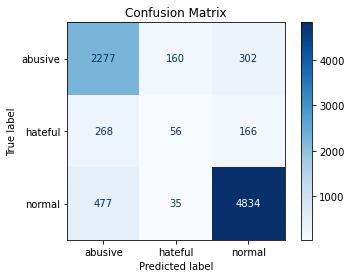

In [45]:
#Compute confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline
disp = ConfusionMatrixDisplay.from_predictions(y_true,pred,display_labels=category,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")

In [46]:
ah_dt_f1_plot = pd.DataFrame({"DT 5 Day Train":clf_5day_f1},index=[1,2,3,4,5,6,7,8,9,10])

# A/H Decision Tree Train One Day AND Test The Rest

In [47]:
#day 1 tweets training
from sklearn import tree
from sklearn import metrics
clf = tree.DecisionTreeClassifier()
clf.set_params(criterion='gini',splitter ='random',
        min_samples_split=4, min_samples_leaf=3)
clf_1day_f1 = []
x_day1,y_day1 = to_xy(day1_tweets,'Label')
clf = clf.fit(x_day1, y_day1)
clf_1day_f1.append(0)

In [48]:
#day 2 tweets testing
x_day2,y_day2 = to_xy(day2_tweets,'Label')
pred = clf.predict(x_day2)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day2,axis=1)
clf_1day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79      2723
           1       0.18      0.09      0.12       513
           2       0.91      0.89      0.90      5340

    accuracy                           0.83      8576
   macro avg       0.61      0.61      0.60      8576
weighted avg       0.81      0.83      0.82      8576



In [49]:
#day 3 tweets testing
x_day3,y_day3 = to_xy(day3_tweets,'Label')
pred = clf.predict(x_day3)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day3,axis=1)
clf_1day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.75      0.85      0.79      2741
           1       0.19      0.10      0.13       478
           2       0.91      0.89      0.90      5357

    accuracy                           0.83      8576
   macro avg       0.62      0.61      0.61      8576
weighted avg       0.82      0.83      0.82      8576



In [50]:
#day 4 tweets testing
x_day4,y_day4 = to_xy(day4_tweets,'Label')
pred = clf.predict(x_day4)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day4,axis=1)
clf_1day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80      2741
           1       0.25      0.14      0.18       442
           2       0.92      0.90      0.91      5393

    accuracy                           0.84      8576
   macro avg       0.64      0.63      0.63      8576
weighted avg       0.83      0.84      0.84      8576



In [51]:
#day 5 tweets testing
x_day5,y_day5 = to_xy(day5_tweets,'Label')
pred = clf.predict(x_day5)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day5,axis=1)
clf_1day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80      2774
           1       0.24      0.12      0.16       508
           2       0.91      0.90      0.91      5293

    accuracy                           0.84      8575
   macro avg       0.64      0.62      0.62      8575
weighted avg       0.82      0.84      0.83      8575



In [52]:
#day 6 tweets testing
x_day6,y_day6 = to_xy(day6_tweets,'Label')
pred = clf.predict(x_day6)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day6,axis=1)
clf_1day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.74      0.84      0.78      2674
           1       0.17      0.08      0.10       488
           2       0.91      0.89      0.90      5413

    accuracy                           0.83      8575
   macro avg       0.60      0.60      0.60      8575
weighted avg       0.81      0.83      0.82      8575



In [53]:
#day 7 tweets testing
x_day7,y_day7 = to_xy(day7_tweets,'Label')
pred = clf.predict(x_day7)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day7,axis=1)
clf_1day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80      2651
           1       0.25      0.13      0.17       489
           2       0.92      0.91      0.91      5435

    accuracy                           0.84      8575
   macro avg       0.64      0.63      0.63      8575
weighted avg       0.83      0.84      0.84      8575



In [54]:
#day 8 tweets testing
x_day8,y_day8 = to_xy(day8_tweets,'Label')
pred = clf.predict(x_day8)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day8,axis=1)
clf_1day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78      2719
           1       0.23      0.12      0.16       556
           2       0.91      0.90      0.90      5300

    accuracy                           0.83      8575
   macro avg       0.63      0.62      0.62      8575
weighted avg       0.81      0.83      0.82      8575



In [55]:
#day 9 tweets testing
x_day9,y_day9 = to_xy(day9_tweets,'Label')
pred = clf.predict(x_day9)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day9,axis=1)
clf_1day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80      2683
           1       0.23      0.11      0.15       492
           2       0.91      0.90      0.91      5400

    accuracy                           0.84      8575
   macro avg       0.63      0.62      0.62      8575
weighted avg       0.82      0.84      0.83      8575



In [56]:
#day 10 tweets testing
x_day10,y_day10 = to_xy(day10_tweets,'Label')
pred = clf.predict(x_day10)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day10,axis=1)
clf_1day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80      2739
           1       0.25      0.14      0.18       490
           2       0.91      0.90      0.90      5346

    accuracy                           0.84      8575
   macro avg       0.64      0.63      0.63      8575
weighted avg       0.82      0.84      0.83      8575



Text(0.5, 1.0, 'Confusion Matrix')

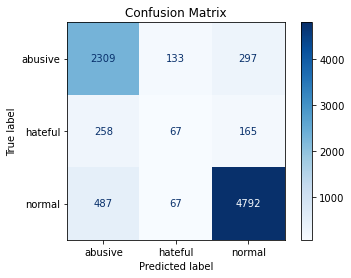

In [57]:
#Compute confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_true,pred,display_labels=category,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")

# A/H Decision Tree Models F1 Score Comparison

In [58]:
ah_dt_f1_plot['DT 1 Day Train'] = clf_1day_f1

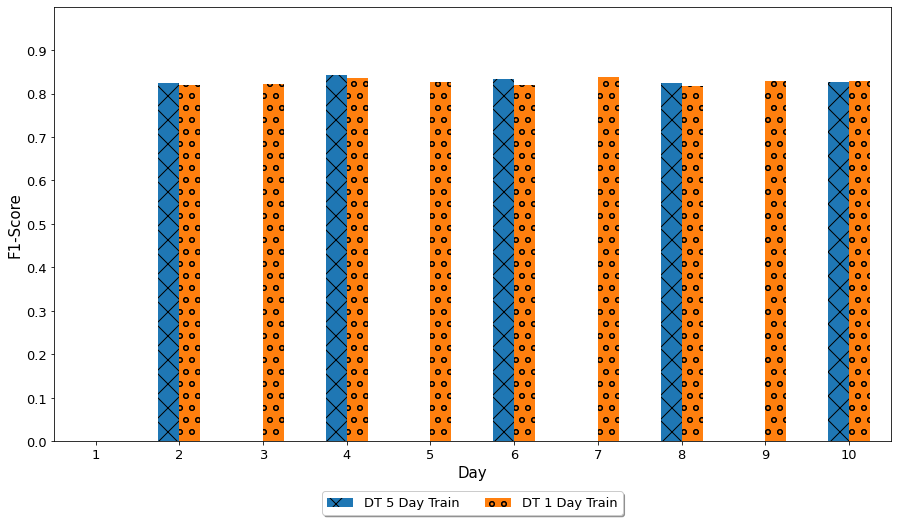

In [59]:
ax = ah_dt_f1_plot.plot(kind="bar",figsize=(15, 8))

bars = ax.patches
hatches = ''.join(h*len(ah_dt_f1_plot) for h in 'xo')

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

plt.xlabel("Day", size=15)
plt.ylabel("F1-Score", size=15)
ticks_loc = np.arange(0, 1, step=.1)
plt.yticks(ticks_loc, fontsize=13)
plt.ylim([0,1])
plt.xticks(fontsize=13, rotation='horizontal')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),fancybox=True, shadow=True, ncol=5, fontsize=13)

# Random Forest Hyperparameter Tuning

In [19]:
from sklearn.model_selection import ParameterGrid
rfc_params = [{"criterion": ["gini","entropy","log_loss"],"n_estimators": [50,100,150], 
              "min_samples_split":[2,3,4], "min_samples_leaf": [1,2,3], "verbose":[0,1,2]}]
rfc_gs = ParameterGrid(rfc_params)

In [21]:
#hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
best_f1_score = 0
best_params = []
for rfc_params in rfc_gs:
    temp_rfc = RandomForestClassifier()
    temp_rfc.set_params(criterion=rfc_params['criterion'],n_estimators =rfc_params['n_estimators'],
        min_samples_split=rfc_params['min_samples_split'], min_samples_leaf=rfc_params['min_samples_leaf'],
        verbose=rfc_params['verbose'])
    # Train the estimator with the samples provided by the data stream
    x,y = to_xy(tweets, 'Label')
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3, random_state=916)
    temp_rfc = temp_rfc.fit(x_train,y_train)
    y_pred = temp_rfc.predict(x_test)
    pred = np.argmax(y_pred,axis=1)
    y_true = np.argmax(y_test,axis=1)
    temp_f1 = f1_score(y_true, pred, average='weighted')
    if temp_f1 >= best_f1_score:
        best_f1_score = temp_f1
        best_params = rfc_params

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.4s


building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.5s


building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.5s


building tree 41 of 150
building tree 42 of 150
building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80 of 150
building tree 81 of 150
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    5.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.7s


building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.3s


building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.8s


building tree 41 of 150
building tree 42 of 150
building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80 of 150
building tree 81 of 150
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.5s


building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.6s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.7s


building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80 of 150
building tree 81 of 150
building tree 82 of 150
building tree 83 of 150
building tree 84

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    4.3s


building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.5s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.6s


building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80 of 150
building tree 81 of 150
building tree 82 of 150
building tree 83 of 150
building tree 84

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.6s


building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.5s


building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.3s


building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80 of 150
building tree 81 of 150
building tree 82 of 150
building tree 83 of 150
building tree 84

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.1s


building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.5s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.4s


building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80 of 150
building tree 81 of 150
building tree 82 of 150
building tree 83 of 150
building tree 84

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.2s


building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.4s


building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.0s


building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80 of 150
building tree 81 of 150
building tree 82 of 150
building tree 83 of 150
building tree 84

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.2s


building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.1s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.3s


building tree 42 of 150
building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80 of 150
building tree 81 of 150
building tree 82 of 150
building tree 83

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.4s


building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    2.9s


building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.5s


building tree 41 of 150
building tree 42 of 150
building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80 of 150
building tree 81 of 150
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    4.1s


building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.8s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.9s


building tree 41 of 150
building tree 42 of 150
building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80 of 150
building tree 81 of 150
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.8s


building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.8s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.9s


building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80 of 150
building tree 81 of 150
building tree 82 of 150
building tree 83 of 150
building tree 84

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.8s


building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.8s


building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.7s


building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80 of 150
building tree 81 of 150
building tree 82 of 150
building tree 83 of 150
building tree 84

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.5s


building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.5s


building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.6s


building tree 42 of 150
building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80 of 150
building tree 81 of 150
building tree 82 of 150
building tree 83

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.4s


building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.5s


building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.5s


building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80 of 150
building tree 81 of 150
building tree 82 of 150
building tree 83 of 150
building tree 84

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.5s


building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.4s


building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.5s


building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80 of 150
building tree 81 of 150
building tree 82 of 150
building tree 83 of 150
building tree 84

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.3s


building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.2s


building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.3s


building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80 of 150
building tree 81 of 150
building tree 82 of 150
building tree 83 of 150
building tree 84

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.3s


building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.3s


building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.4s


building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80 of 150
building tree 81 of 150
building tree 82 of 150
building tree 83 of 150
building tree 84

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.6s


building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.2s


building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.6s


building tree 42 of 150
building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80 of 150
building tree 81 of 150
building tree 82 of 150
building tree 83

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.9s


building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    4.0s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    4.0s


building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80 of 150
building tree 81 of 150
building tree 82 of 150
building tree 83 of 150
building tree 84

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.8s


building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    4.4s


building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.7s


building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80 of 150
building tree 81 of 150
building tree 82 of 150
building tree 83 of 150
building tree 84

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.8s


building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.8s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.7s


building tree 42 of 150
building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80 of 150
building tree 81 of 150
building tree 82 of 150
building tree 83

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.7s


building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.5s


building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.5s


building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80 of 150
building tree 81 of 150
building tree 82 of 150
building tree 83 of 150
building tree 84

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.5s


building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.5s


building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.4s


building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80 of 150
building tree 81 of 150
building tree 82 of 150
building tree 83 of 150
building tree 84

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.5s


building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.4s


building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.5s


building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80 of 150
building tree 81 of 150
building tree 82 of 150
building tree 83 of 150
building tree 84

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.3s


building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.2s


building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.3s


building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80 of 150
building tree 81 of 150
building tree 82 of 150
building tree 83 of 150
building tree 84

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.2s


building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.3s


building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.5s


building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80 of 150
building tree 81 of 150
building tree 82 of 150
building tree 83 of 150
building tree 84

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.2s


building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.4s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    3.3s


building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80 of 150
building tree 81 of 150
building tree 82 of 150
building tree 83 of 150
building tree 84

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s


In [22]:
best_params

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100,
 'verbose': 1}

# A/H Random Forest Train Five Days AND Test Five Days

In [60]:
#day 1 tweets training
from sklearn.ensemble import RandomForestClassifier
rfc_5day_f1 = []
rfc = RandomForestClassifier(criterion='gini',min_samples_leaf=1,min_samples_split=4,
                             n_estimators=100,verbose = 1, warm_start = True)
rfc = rfc.fit(x_day1,y_day1)
rfc_5day_f1.append(0)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s


In [61]:
#day 2 tweets testing
pred = rfc.predict(x_day2)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day2,axis=1)
rfc_5day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84      2723
           1       0.58      0.06      0.10       513
           2       0.93      0.93      0.93      5340

    accuracy                           0.87      8576
   macro avg       0.76      0.63      0.62      8576
weighted avg       0.86      0.87      0.85      8576



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [62]:
#day 3 tweets training
rfc = rfc.fit(x_day3,y_day3)
rfc_5day_f1.append(0)

c:\Users\aztec\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


In [63]:
#day 4 tweets testing
pred = rfc.predict(x_day4)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day4,axis=1)
rfc_5day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2741
           1       0.73      0.07      0.13       442
           2       0.94      0.93      0.94      5393

    accuracy                           0.89      8576
   macro avg       0.82      0.64      0.64      8576
weighted avg       0.88      0.89      0.87      8576



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [64]:
#day 5 tweets training
rfc = rfc.fit(x_day5,y_day5)
rfc_5day_f1.append(0)

c:\Users\aztec\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


In [65]:
#day 6 tweets testing
pred = rfc.predict(x_day6)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day6,axis=1)
rfc_5day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84      2674
           1       0.73      0.06      0.10       488
           2       0.93      0.93      0.93      5413

    accuracy                           0.87      8575
   macro avg       0.81      0.63      0.62      8575
weighted avg       0.87      0.87      0.85      8575



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [66]:
#day 7 tweets training
rfc = rfc.fit(x_day7,y_day7)
rfc_5day_f1.append(0)

c:\Users\aztec\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


In [67]:
#day 8 tweets testing
pred = rfc.predict(x_day8)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day8,axis=1)
rfc_5day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84      2719
           1       0.68      0.08      0.15       556
           2       0.93      0.93      0.93      5300

    accuracy                           0.87      8575
   macro avg       0.79      0.64      0.64      8575
weighted avg       0.86      0.87      0.85      8575



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [68]:
#day 9 tweets training
rfc = rfc.fit(x_day9,y_day9)
rfc_5day_f1.append(0)

c:\Users\aztec\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


In [69]:
#day 10 tweets testing
pred = rfc.predict(x_day10)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day10,axis=1)
rfc_5day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      2739
           1       0.70      0.07      0.13       490
           2       0.93      0.93      0.93      5346

    accuracy                           0.88      8575
   macro avg       0.81      0.64      0.64      8575
weighted avg       0.87      0.88      0.86      8575



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Text(0.5, 1.0, 'Confusion Matrix')

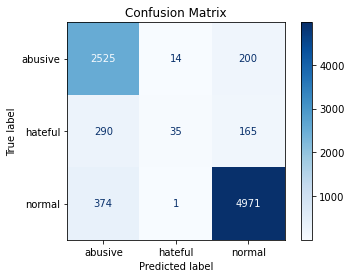

In [70]:
# Compute confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_true,pred,display_labels=category,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")

In [71]:
ah_rfc_f1_plot = pd.DataFrame({"RFC 5 Day Train":rfc_5day_f1},index=[1,2,3,4,5,6,7,8,9,10])
gini_model = rfc

# A/H Random Forest Train One Day And Test The Rest

In [72]:
#day 1 tweets training
from sklearn.ensemble import RandomForestClassifier
rfc_1day_f1 = []
rfc = RandomForestClassifier(criterion='gini',min_samples_leaf=1,min_samples_split=4,
                             n_estimators=100,verbose = 1, warm_start = True)
rfc = rfc.fit(x_day1,y_day1)
rfc_1day_f1.append(0)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s


In [73]:
#day 2 tweets testing
pred = rfc.predict(x_day2)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day2,axis=1)
rfc_1day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84      2723
           1       0.67      0.05      0.10       513
           2       0.93      0.93      0.93      5340

    accuracy                           0.87      8576
   macro avg       0.79      0.63      0.62      8576
weighted avg       0.87      0.87      0.85      8576



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [74]:
#day 3 tweets testing
pred = rfc.predict(x_day3)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day3,axis=1)
rfc_1day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85      2741
           1       0.72      0.05      0.09       478
           2       0.93      0.92      0.93      5357

    accuracy                           0.87      8576
   macro avg       0.81      0.63      0.62      8576
weighted avg       0.87      0.87      0.85      8576



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [75]:
#day 4 tweets testing
pred = rfc.predict(x_day4)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day4,axis=1)
rfc_1day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2741
           1       0.74      0.07      0.12       442
           2       0.94      0.93      0.94      5393

    accuracy                           0.89      8576
   macro avg       0.83      0.64      0.64      8576
weighted avg       0.88      0.89      0.87      8576



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [76]:
#day 5 tweets testing
pred = rfc.predict(x_day5)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day5,axis=1)
rfc_1day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      2774
           1       0.76      0.09      0.16       508
           2       0.94      0.93      0.93      5293

    accuracy                           0.88      8575
   macro avg       0.83      0.65      0.65      8575
weighted avg       0.88      0.88      0.86      8575



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [77]:
#day 6 tweets testing
pred = rfc.predict(x_day6)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day6,axis=1)
rfc_1day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84      2674
           1       0.72      0.05      0.09       488
           2       0.93      0.93      0.93      5413

    accuracy                           0.87      8575
   macro avg       0.81      0.63      0.62      8575
weighted avg       0.87      0.87      0.85      8575



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [78]:
#day 7 tweets testing
pred = rfc.predict(x_day7)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day7,axis=1)
rfc_1day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85      2651
           1       0.77      0.08      0.14       489
           2       0.94      0.93      0.93      5435

    accuracy                           0.88      8575
   macro avg       0.83      0.64      0.64      8575
weighted avg       0.88      0.88      0.86      8575



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [79]:
#day 8 tweets testing
pred = rfc.predict(x_day8)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day8,axis=1)
rfc_1day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84      2719
           1       0.70      0.08      0.14       556
           2       0.93      0.93      0.93      5300

    accuracy                           0.87      8575
   macro avg       0.80      0.64      0.64      8575
weighted avg       0.87      0.87      0.85      8575



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [80]:
#day 9 tweets testing
pred = rfc.predict(x_day9)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day9,axis=1)
rfc_1day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      2683
           1       0.79      0.05      0.10       492
           2       0.93      0.93      0.93      5400

    accuracy                           0.88      8575
   macro avg       0.84      0.64      0.63      8575
weighted avg       0.88      0.88      0.86      8575



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [81]:
#day 10 tweets testing
pred = rfc.predict(x_day10)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_day10,axis=1)
rfc_1day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      2739
           1       0.76      0.07      0.13       490
           2       0.93      0.93      0.93      5346

    accuracy                           0.88      8575
   macro avg       0.83      0.64      0.64      8575
weighted avg       0.88      0.88      0.86      8575



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Text(0.5, 1.0, 'Confusion Matrix')

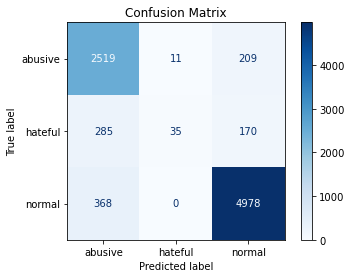

In [82]:
# Compute confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_true,pred,display_labels=category,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")

# A/H Random Forest Models F1 Score Comparison

In [83]:
ah_rfc_f1_plot['RFC 1 Day Train'] = rfc_1day_f1

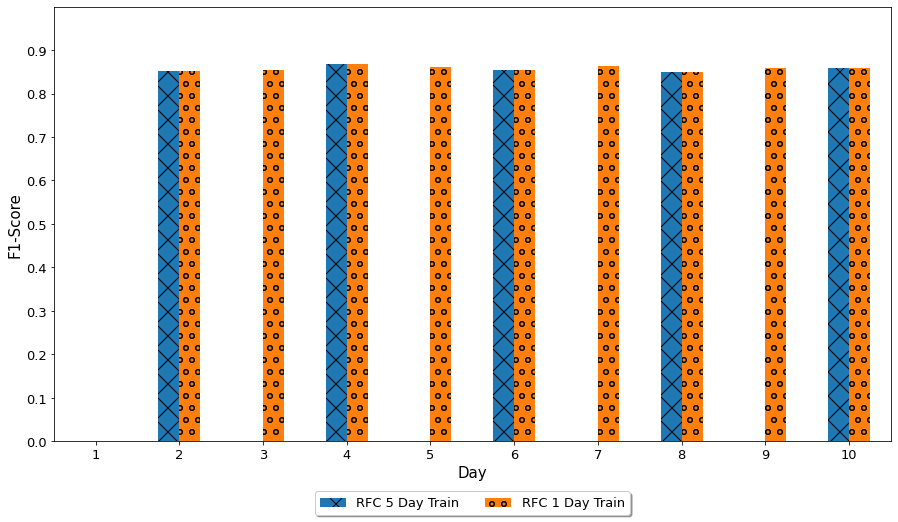

In [84]:
ax = ah_rfc_f1_plot.plot(kind="bar",figsize=(15, 8))

bars = ax.patches
hatches = ''.join(h*len(ah_rfc_f1_plot) for h in 'xo')

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

plt.xlabel("Day", size=15)
plt.ylabel("F1-Score", size=15)
ticks_loc = np.arange(0, 1, step=.1)
plt.yticks(ticks_loc, fontsize=13)
plt.ylim([0,1])
plt.xticks(fontsize=13, rotation='horizontal')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),fancybox=True, shadow=True, ncol=5, fontsize=13)

# Logistic Regression Hyperparameter Tuning

In [24]:
from sklearn.model_selection import ParameterGrid
lr_params = [{"max_iter":[50,100,150],
              "solver": ["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"], 
              "verbose":[0,1,2]}]
lr_gs = ParameterGrid(lr_params)

In [33]:
#hyperparameter tuning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score
best_f1_score = 0
best_params = []
for lr_params in lr_gs:
    temp_lr = LogisticRegression()
    temp_lr.set_params(max_iter =lr_params['max_iter'],
        solver=lr_params['solver'], 
        verbose=lr_params['verbose'])
    for penalty in ["l1""elastinet", None] :
        if (penalty == "l1" and (temp_lr.solver == "liblinear" or temp_lr.solver == "saga")):
            temp_lr.set_params(penalty = "l1")
        elif (penalty == "elastinet" and temp_lr.solver == "saga"):
            temp_lr.set_params(penalty = "elastinet")
        elif (penalty == None and (temp_lr.solver=="lbfgs" or temp_lr.solver=="newton-cg" 
                                or temp_lr.solver=="newton-cholseky" or temp_lr.solver=="sag" or temp_lr.solver=="saga")):
            temp_lr.set_params(penalty=None)
        else:
            temp_lr.set_params(penalty="l2")
        # Train the estimator with the samples provided by the data stream
        x,y = to_xy(tweets, 'Label')
        x_train, x_test = train_test_split(x, test_size=.3, random_state=916)
        y_train, y_test = train_test_split(tweets['Label'].values, test_size=.3, random_state=916)
        temp_lr = temp_lr.fit(x_train,y_train)
        y_pred = temp_lr.predict(x_test)
        temp_f1 = f1_score(y_test, y_pred, average='weighted')
        if temp_f1 >= best_f1_score:
            best_f1_score = temp_f1
            best_params = lr_params
            best_params['penalty'] = temp_lr.penalty

[LibLinear][LibLinear][LibLinear][LibLinear]

c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Us

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06771543622016907 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.016386890783905983 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0020613735541701317 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 4.9812166253104806e-05 <= 0.0001
    2. Newton decrement 8.190013613784686e-05 <= 0.0001
  Solver did converge at loss = 0.32359431082852.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.08981776237487793 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.02331436425447464 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.004641903098672628 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00042382971150800586 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 4.9746595323085785e-06 <= 0.0001
    2. Newton decrement 5.430765668279491e-06 <= 0.0001
  Solver did converge at loss = 0.19998243206154273

c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Us

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06771543622016907 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.016386890783905983 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0020613735541701317 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 4.9812166253104806e-05 <= 0.0001
    2. Newton decrement 8.190013613784686e-05 <= 0.0001
  Solver did converge at loss = 0.32359431082852.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.08981776237487793 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.02331436425447464 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.004641903098672628 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00042382971150800586 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 4.9746595323085785e-06 <= 0.0001
    2. Newton decrement 5.430765668279491e-06 <= 0.0001
  Solver did converge at loss = 0.19998243206154273

c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Us

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06771543622016907 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.016386890783905983 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0020613735541701317 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 4.9812166253104806e-05 <= 0.0001
    2. Newton decrement 8.190013613784686e-05 <= 0.0001
  Solver did converge at loss = 0.32359431082852.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.08981776237487793 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.02331436425447464 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.004641903098672628 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00042382971150800586 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 4.9746595323085785e-06 <= 0.0001
    2. Newton decrement 5.430765668279491e-06 <= 0.0001
  Solver did converge at loss = 0.19998243206154273

c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Us

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06771543622016907 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.016386890783905983 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0020613735541701317 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 4.9812166253104806e-05 <= 0.0001
    2. Newton decrement 8.190013613784686e-05 <= 0.0001
  Solver did converge at loss = 0.32359431082852.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.08981776237487793 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.02331436425447464 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.004641903098672628 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00042382971150800586 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 4.9746595323085785e-06 <= 0.0001
    2. Newton decrement 5.430765668279491e-06 <= 0.0001
  Solver did converge at loss = 0.19998243206154273

c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Us

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06771543622016907 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.016386890783905983 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0020613735541701317 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 4.9812166253104806e-05 <= 0.0001
    2. Newton decrement 8.190013613784686e-05 <= 0.0001
  Solver did converge at loss = 0.32359431082852.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.08981776237487793 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.02331436425447464 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.004641903098672628 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00042382971150800586 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 4.9746595323085785e-06 <= 0.0001
    2. Newton decrement 5.430765668279491e-06 <= 0.0001
  Solver did converge at loss = 0.19998243206154273

c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Us

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06771543622016907 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.016386890783905983 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0020613735541701317 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 4.9812166253104806e-05 <= 0.0001
    2. Newton decrement 8.190013613784686e-05 <= 0.0001
  Solver did converge at loss = 0.32359431082852.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.08981776237487793 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.02331436425447464 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.004641903098672628 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00042382971150800586 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 4.9746595323085785e-06 <= 0.0001
    2. Newton decrement 5.430765668279491e-06 <= 0.0001
  Solver did converge at loss = 0.19998243206154273

c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Us

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06771543622016907 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.016386890783905983 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0020613735541701317 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 4.9812166253104806e-05 <= 0.0001
    2. Newton decrement 8.190013613784686e-05 <= 0.0001
  Solver did converge at loss = 0.32359431082852.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.08981776237487793 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.02331436425447464 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.004641903098672628 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00042382971150800586 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 4.9746595323085785e-06 <= 0.0001
    2. Newton decrement 5.430765668279491e-06 <= 0.0001
  Solver did converge at loss = 0.19998243206154273

c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Us

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06771543622016907 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.016386890783905983 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0020613735541701317 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 4.9812166253104806e-05 <= 0.0001
    2. Newton decrement 8.190013613784686e-05 <= 0.0001
  Solver did converge at loss = 0.32359431082852.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.08981776237487793 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.02331436425447464 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.004641903098672628 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00042382971150800586 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 4.9746595323085785e-06 <= 0.0001
    2. Newton decrement 5.430765668279491e-06 <= 0.0001
  Solver did converge at loss = 0.19998243206154273

c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Us

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06771543622016907 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.016386890783905983 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0020613735541701317 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 4.9812166253104806e-05 <= 0.0001
    2. Newton decrement 8.190013613784686e-05 <= 0.0001
  Solver did converge at loss = 0.32359431082852.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.08981776237487793 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.02331436425447464 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.004641903098672628 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00042382971150800586 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 4.9746595323085785e-06 <= 0.0001
    2. Newton decrement 5.430765668279491e-06 <= 0.0001
  Solver did converge at loss = 0.19998243206154273

c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Us

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06771543622016907 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.016386890783905983 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0020613735541701317 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 4.9812166253104806e-05 <= 0.0001
    2. Newton decrement 8.190013613784686e-05 <= 0.0001
  Solver did converge at loss = 0.32359431082852.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.08981776237487793 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.02331436425447464 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.004641903098672628 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00042382971150800586 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 4.9746595323085785e-06 <= 0.0001
    2. Newton decrement 5.430765668279491e-06 <= 0.0001
  Solver did converge at loss = 0.19998243206154273

c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Us

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06771543622016907 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.016386890783905983 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0020613735541701317 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 4.9812166253104806e-05 <= 0.0001
    2. Newton decrement 8.190013613784686e-05 <= 0.0001
  Solver did converge at loss = 0.32359431082852.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.08981776237487793 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.02331436425447464 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.004641903098672628 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00042382971150800586 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 4.9746595323085785e-06 <= 0.0001
    2. Newton decrement 5.430765668279491e-06 <= 0.0001
  Solver did converge at loss = 0.19998243206154273

c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Us

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06771543622016907 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.016386890783905983 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0020613735541701317 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 4.9812166253104806e-05 <= 0.0001
    2. Newton decrement 8.190013613784686e-05 <= 0.0001
  Solver did converge at loss = 0.32359431082852.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.08981776237487793 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.02331436425447464 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.004641903098672628 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00042382971150800586 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 4.9746595323085785e-06 <= 0.0001
    2. Newton decrement 5.430765668279491e-06 <= 0.0001
  Solver did converge at loss = 0.19998243206154273

c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Us

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06771543622016907 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.016386890783905983 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0020613735541701317 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 4.9812166253104806e-05 <= 0.0001
    2. Newton decrement 8.190013613784686e-05 <= 0.0001
  Solver did converge at loss = 0.32359431082852.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.08981776237487793 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.02331436425447464 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.004641903098672628 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00042382971150800586 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 4.9746595323085785e-06 <= 0.0001
    2. Newton decrement 5.430765668279491e-06 <= 0.0001
  Solver did converge at loss = 0.19998243206154273

c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Us

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06771543622016907 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.016386890783905983 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0020613735541701317 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 4.9812166253104806e-05 <= 0.0001
    2. Newton decrement 8.190013613784686e-05 <= 0.0001
  Solver did converge at loss = 0.32359431082852.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.08981776237487793 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.02331436425447464 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.004641903098672628 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00042382971150800586 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 4.9746595323085785e-06 <= 0.0001
    2. Newton decrement 5.430765668279491e-06 <= 0.0001
  Solver did converge at loss = 0.19998243206154273

c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Us

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06771543622016907 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.016386890783905983 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0020613735541701317 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 4.9812166253104806e-05 <= 0.0001
    2. Newton decrement 8.190013613784686e-05 <= 0.0001
  Solver did converge at loss = 0.32359431082852.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.08981776237487793 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.02331436425447464 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.004641903098672628 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00042382971150800586 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 4.9746595323085785e-06 <= 0.0001
    2. Newton decrement 5.430765668279491e-06 <= 0.0001
  Solver did converge at loss = 0.19998243206154273

c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Us

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06771543622016907 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.016386890783905983 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0020613735541701317 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 4.9812166253104806e-05 <= 0.0001
    2. Newton decrement 8.190013613784686e-05 <= 0.0001
  Solver did converge at loss = 0.32359431082852.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.08981776237487793 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.02331436425447464 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.004641903098672628 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00042382971150800586 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 4.9746595323085785e-06 <= 0.0001
    2. Newton decrement 5.430765668279491e-06 <= 0.0001
  Solver did converge at loss = 0.19998243206154273

c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Us

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06771543622016907 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.016386890783905983 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0020613735541701317 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 4.9812166253104806e-05 <= 0.0001
    2. Newton decrement 8.190013613784686e-05 <= 0.0001
  Solver did converge at loss = 0.32359431082852.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.08981776237487793 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.02331436425447464 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.004641903098672628 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00042382971150800586 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 4.9746595323085785e-06 <= 0.0001
    2. Newton decrement 5.430765668279491e-06 <= 0.0001
  Solver did converge at loss = 0.19998243206154273

c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Us

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06771543622016907 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.016386890783905983 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0020613735541701317 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 4.9812166253104806e-05 <= 0.0001
    2. Newton decrement 8.190013613784686e-05 <= 0.0001
  Solver did converge at loss = 0.32359431082852.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.08981776237487793 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.02331436425447464 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.004641903098672628 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00042382971150800586 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 4.9746595323085785e-06 <= 0.0001
    2. Newton decrement 5.430765668279491e-06 <= 0.0001
  Solver did converge at loss = 0.19998243206154273

c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Us

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06771543622016907 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.016386890783905983 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0020613735541701317 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 4.9812166253104806e-05 <= 0.0001
    2. Newton decrement 8.190013613784686e-05 <= 0.0001
  Solver did converge at loss = 0.32359431082852.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.08981776237487793 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.02331436425447464 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.004641903098672628 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00042382971150800586 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 4.9746595323085785e-06 <= 0.0001
    2. Newton decrement 5.430765668279491e-06 <= 0.0001
  Solver did converge at loss = 0.19998243206154273

c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Us

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06771543622016907 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.016386890783905983 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0020613735541701317 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 4.9812166253104806e-05 <= 0.0001
    2. Newton decrement 8.190013613784686e-05 <= 0.0001
  Solver did converge at loss = 0.32359431082852.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.08981776237487793 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.02331436425447464 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.004641903098672628 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00042382971150800586 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 4.9746595323085785e-06 <= 0.0001
    2. Newton decrement 5.430765668279491e-06 <= 0.0001
  Solver did converge at loss = 0.19998243206154273

c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Us

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06771543622016907 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.016386890783905983 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0020613735541701317 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 4.9812166253104806e-05 <= 0.0001
    2. Newton decrement 8.190013613784686e-05 <= 0.0001
  Solver did converge at loss = 0.32359431082852.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.08981776237487793 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.02331436425447464 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.004641903098672628 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00042382971150800586 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 4.9746595323085785e-06 <= 0.0001
    2. Newton decrement 5.430765668279491e-06 <= 0.0001
  Solver did converge at loss = 0.19998243206154273

c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Us

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06771543622016907 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.016386890783905983 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0020613735541701317 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 4.9812166253104806e-05 <= 0.0001
    2. Newton decrement 8.190013613784686e-05 <= 0.0001
  Solver did converge at loss = 0.32359431082852.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.08981776237487793 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.02331436425447464 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.004641903098672628 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00042382971150800586 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 4.9746595323085785e-06 <= 0.0001
    2. Newton decrement 5.430765668279491e-06 <= 0.0001
  Solver did converge at loss = 0.19998243206154273

c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Us

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06771543622016907 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.016386890783905983 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0020613735541701317 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 4.9812166253104806e-05 <= 0.0001
    2. Newton decrement 8.190013613784686e-05 <= 0.0001
  Solver did converge at loss = 0.32359431082852.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.08981776237487793 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.02331436425447464 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.004641903098672628 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00042382971150800586 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 4.9746595323085785e-06 <= 0.0001
    2. Newton decrement 5.430765668279491e-06 <= 0.0001
  Solver did converge at loss = 0.19998243206154273

c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Us

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06771543622016907 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.016386890783905983 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0020613735541701317 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 4.9812166253104806e-05 <= 0.0001
    2. Newton decrement 8.190013613784686e-05 <= 0.0001
  Solver did converge at loss = 0.32359431082852.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.08981776237487793 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.02331436425447464 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.004641903098672628 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00042382971150800586 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 4.9746595323085785e-06 <= 0.0001
    2. Newton decrement 5.430765668279491e-06 <= 0.0001
  Solver did converge at loss = 0.19998243206154273

c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Us

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06771543622016907 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.016386890783905983 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0020613735541701317 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 4.9812166253104806e-05 <= 0.0001
    2. Newton decrement 8.190013613784686e-05 <= 0.0001
  Solver did converge at loss = 0.32359431082852.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.08981776237487793 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.02331436425447464 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.004641903098672628 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00042382971150800586 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 4.9746595323085785e-06 <= 0.0001
    2. Newton decrement 5.430765668279491e-06 <= 0.0001
  Solver did converge at loss = 0.19998243206154273

c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Us

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06771543622016907 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.016386890783905983 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0020613735541701317 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 4.9812166253104806e-05 <= 0.0001
    2. Newton decrement 8.190013613784686e-05 <= 0.0001
  Solver did converge at loss = 0.32359431082852.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.08981776237487793 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.02331436425447464 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.004641903098672628 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00042382971150800586 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 4.9746595323085785e-06 <= 0.0001
    2. Newton decrement 5.430765668279491e-06 <= 0.0001
  Solver did converge at loss = 0.19998243206154273

c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Us

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06771543622016907 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.016386890783905983 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0020613735541701317 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 4.9812166253104806e-05 <= 0.0001
    2. Newton decrement 8.190013613784686e-05 <= 0.0001
  Solver did converge at loss = 0.32359431082852.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.08981776237487793 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.02331436425447464 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.004641903098672628 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00042382971150800586 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 4.9746595323085785e-06 <= 0.0001
    2. Newton decrement 5.430765668279491e-06 <= 0.0001
  Solver did converge at loss = 0.19998243206154273

c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Us

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06771543622016907 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.016386890783905983 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0020613735541701317 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 4.9812166253104806e-05 <= 0.0001
    2. Newton decrement 8.190013613784686e-05 <= 0.0001
  Solver did converge at loss = 0.32359431082852.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.08981776237487793 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.02331436425447464 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.004641903098672628 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00042382971150800586 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 4.9746595323085785e-06 <= 0.0001
    2. Newton decrement 5.430765668279491e-06 <= 0.0001
  Solver did converge at loss = 0.19998243206154273

c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Us

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06771543622016907 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.016386890783905983 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0020613735541701317 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 4.9812166253104806e-05 <= 0.0001
    2. Newton decrement 8.190013613784686e-05 <= 0.0001
  Solver did converge at loss = 0.32359431082852.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.08981776237487793 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.02331436425447464 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.004641903098672628 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00042382971150800586 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 4.9746595323085785e-06 <= 0.0001
    2. Newton decrement 5.430765668279491e-06 <= 0.0001
  Solver did converge at loss = 0.19998243206154273

c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Us

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06771543622016907 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.016386890783905983 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0020613735541701317 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 4.9812166253104806e-05 <= 0.0001
    2. Newton decrement 8.190013613784686e-05 <= 0.0001
  Solver did converge at loss = 0.32359431082852.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.08981776237487793 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.02331436425447464 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.004641903098672628 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00042382971150800586 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 4.9746595323085785e-06 <= 0.0001
    2. Newton decrement 5.430765668279491e-06 <= 0.0001
  Solver did converge at loss = 0.19998243206154273

c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Us

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06771543622016907 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.016386890783905983 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0020613735541701317 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 4.9812166253104806e-05 <= 0.0001
    2. Newton decrement 8.190013613784686e-05 <= 0.0001
  Solver did converge at loss = 0.32359431082852.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.08981776237487793 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.02331436425447464 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.004641903098672628 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00042382971150800586 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 4.9746595323085785e-06 <= 0.0001
    2. Newton decrement 5.430765668279491e-06 <= 0.0001
  Solver did converge at loss = 0.19998243206154273

c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Us

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06771543622016907 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.016386890783905983 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0020613735541701317 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 4.9812166253104806e-05 <= 0.0001
    2. Newton decrement 8.190013613784686e-05 <= 0.0001
  Solver did converge at loss = 0.32359431082852.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.08981776237487793 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.02331436425447464 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.004641903098672628 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00042382971150800586 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 4.9746595323085785e-06 <= 0.0001
    2. Newton decrement 5.430765668279491e-06 <= 0.0001
  Solver did converge at loss = 0.19998243206154273

c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Us

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06771543622016907 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.016386890783905983 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0020613735541701317 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 4.9812166253104806e-05 <= 0.0001
    2. Newton decrement 8.190013613784686e-05 <= 0.0001
  Solver did converge at loss = 0.32359431082852.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.08981776237487793 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.02331436425447464 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.004641903098672628 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00042382971150800586 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 4.9746595323085785e-06 <= 0.0001
    2. Newton decrement 5.430765668279491e-06 <= 0.0001
  Solver did converge at loss = 0.19998243206154273

c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Us

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06771543622016907 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.016386890783905983 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0020613735541701317 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 4.9812166253104806e-05 <= 0.0001
    2. Newton decrement 8.190013613784686e-05 <= 0.0001
  Solver did converge at loss = 0.32359431082852.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.08981776237487793 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.02331436425447464 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.004641903098672628 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00042382971150800586 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 4.9746595323085785e-06 <= 0.0001
    2. Newton decrement 5.430765668279491e-06 <= 0.0001
  Solver did converge at loss = 0.19998243206154273

c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Us

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06771543622016907 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.016386890783905983 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0020613735541701317 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 4.9812166253104806e-05 <= 0.0001
    2. Newton decrement 8.190013613784686e-05 <= 0.0001
  Solver did converge at loss = 0.32359431082852.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.08981776237487793 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.02331436425447464 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.004641903098672628 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00042382971150800586 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 4.9746595323085785e-06 <= 0.0001
    2. Newton decrement 5.430765668279491e-06 <= 0.0001
  Solver did converge at loss = 0.19998243206154273

c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\aztec\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\aztec\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: Us

Newton iter=1
  Check Convergence
    1. max |gradient| 0.06771543622016907 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.016386890783905983 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0020613735541701317 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 4.9812166253104806e-05 <= 0.0001
    2. Newton decrement 8.190013613784686e-05 <= 0.0001
  Solver did converge at loss = 0.32359431082852.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.08981776237487793 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.02331436425447464 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.004641903098672628 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.00042382971150800586 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 4.9746595323085785e-06 <= 0.0001
    2. Newton decrement 5.430765668279491e-06 <= 0.0001
  Solver did converge at loss = 0.19998243206154273

In [34]:
best_params

{'max_iter': 150,
 'multi_class': 'multinomial',
 'penalty': None,
 'solver': 'saga',
 'verbose': 0}

# A/H Logistic Regression Train Five Days AND Test Five Days

In [85]:
# day 1 tweets training
from sklearn.linear_model import LogisticRegression
x_day1,y_day1 = to_xy(day1_tweets,'Label')
y_day1 = day1_tweets["Label"].values
lr_5day_f1 = []
lr = LogisticRegression(max_iter=150, multi_class="multinomial",
                        penalty=None, solver = "saga", verbose = 0, warm_start = True)
lr = lr.fit(x_day1,y_day1)
lr_5day_f1.append(0)

c:\Users\aztec\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [86]:
#day 2 tweets testing
x_day2,y_day2 = to_xy(day2_tweets,'Label')
y_day2 = day2_tweets["Label"].values
pred = lr.predict(x_day2)
lr_5day_f1.append(f1_score(y_day2,pred,average='weighted'))
print(metrics.classification_report(y_day2, pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      2723
           1       0.00      0.00      0.00       513
           2       0.90      0.95      0.92      5340

    accuracy                           0.86      8576
   macro avg       0.57      0.60      0.58      8576
weighted avg       0.81      0.86      0.84      8576



In [87]:
#day 3 tweets training
x_day3,y_day3 = to_xy(day3_tweets,'Label')
y_day3 = day3_tweets["Label"].values
lr = lr.fit(x_day3,y_day3)
lr_5day_f1.append(0)

In [88]:
#day 4 tweets testing
x_day4,y_day4 = to_xy(day4_tweets,'Label')
y_day4 = day4_tweets["Label"].values
pred = lr.predict(x_day4)
lr_5day_f1.append(f1_score(y_day4,pred,average='weighted'))
print(metrics.classification_report(y_day4, pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      2741
           1       0.00      0.00      0.00       442
           2       0.91      0.95      0.93      5393

    accuracy                           0.88      8576
   macro avg       0.58      0.61      0.59      8576
weighted avg       0.83      0.88      0.86      8576



In [89]:
#day 5 tweets training
x_day5,y_day5 = to_xy(day5_tweets,'Label')
y_day5 = day5_tweets["Label"].values
lr = lr.fit(x_day5,y_day5)
lr_5day_f1.append(0)

In [90]:
#day 6 tweets testing
x_day6,y_day6 = to_xy(day6_tweets,'Label')
y_day6 = day6_tweets["Label"].values
pred = lr.predict(x_day6)
lr_5day_f1.append(f1_score(y_day6,pred,average='weighted'))
print(metrics.classification_report(y_day6, pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      2674
           1       0.50      0.00      0.01       488
           2       0.91      0.95      0.93      5413

    accuracy                           0.87      8575
   macro avg       0.73      0.61      0.59      8575
weighted avg       0.85      0.87      0.85      8575



In [91]:
#day 7 tweets training
x_day7,y_day7 = to_xy(day7_tweets,'Label')
y_day7 = day7_tweets["Label"].values
lr = lr.fit(x_day7,y_day7)
lr_5day_f1.append(0)

In [92]:
#day 8 tweets testing
x_day8,y_day8 = to_xy(day8_tweets,'Label')
y_day8 = day8_tweets["Label"].values
pred = lr.predict(x_day8)
lr_5day_f1.append(f1_score(y_day8,pred,average='weighted'))
print(metrics.classification_report(y_day8, pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      2719
           1       0.00      0.00      0.00       556
           2       0.90      0.95      0.92      5300

    accuracy                           0.86      8575
   macro avg       0.56      0.61      0.58      8575
weighted avg       0.81      0.86      0.83      8575



In [93]:
#day 9 tweets training
x_day9,y_day9 = to_xy(day9_tweets,'Label')
y_day9 = day9_tweets["Label"].values
lr = lr.fit(x_day9,y_day9)
lr_5day_f1.append(0)

In [94]:
#day 10 tweets testing
x_day10,y_day10 = to_xy(day10_tweets,'Label')
y_day10 = day10_tweets["Label"].values
pred = lr.predict(x_day10)
lr_5day_f1.append(f1_score(y_day10,pred,average='weighted'))
print(metrics.classification_report(y_day10, pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      2739
           1       0.27      0.01      0.02       490
           2       0.91      0.95      0.93      5346

    accuracy                           0.87      8575
   macro avg       0.66      0.61      0.60      8575
weighted avg       0.84      0.87      0.85      8575



Text(0.5, 1.0, 'Confusion Matrix')

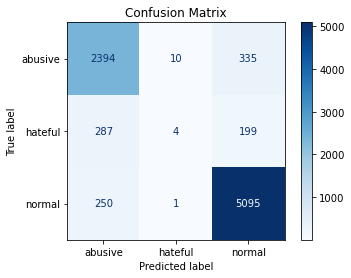

In [95]:
# Compute confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_day10,pred,display_labels=category,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")

In [96]:
ah_lr_f1_plot = pd.DataFrame({"LR 5 Day Train":lr_5day_f1},index=[1,2,3,4,5,6,7,8,9,10])

# A/H Logistic Regression Train One Day AND Test The Rest

In [97]:
# day 1 tweets training
from sklearn.linear_model import LogisticRegression
x_day1,y_day1 = to_xy(day1_tweets,'Label')
y_day1 = day1_tweets["Label"].values
lr_1day_f1 = []
lr = LogisticRegression(max_iter=150, multi_class="multinomial",
                        penalty=None, solver = "saga", verbose = 0, warm_start = True)
lr = lr.fit(x_day1,y_day1)
lr_1day_f1.append(0)

c:\Users\aztec\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [98]:
#day 2 tweets testing
x_day2,y_day2 = to_xy(day2_tweets,'Label')
y_day2 = day2_tweets["Label"].values
pred = lr.predict(x_day2)
lr_1day_f1.append(f1_score(y_day2,pred,average='weighted'))
print(metrics.classification_report(y_day2, pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      2723
           1       0.00      0.00      0.00       513
           2       0.90      0.95      0.92      5340

    accuracy                           0.86      8576
   macro avg       0.57      0.60      0.58      8576
weighted avg       0.81      0.86      0.84      8576



In [99]:
#day 3 tweets testing
x_day3,y_day3 = to_xy(day3_tweets,'Label')
y_day3 = day3_tweets["Label"].values
pred = lr.predict(x_day3)
lr_1day_f1.append(f1_score(y_day3,pred,average='weighted'))
print(metrics.classification_report(y_day3, pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      2741
           1       0.38      0.01      0.01       478
           2       0.90      0.94      0.92      5357

    accuracy                           0.87      8576
   macro avg       0.69      0.61      0.59      8576
weighted avg       0.84      0.87      0.84      8576



In [100]:
#day 4 tweets testing
x_day4,y_day4 = to_xy(day4_tweets,'Label')
y_day4 = day4_tweets["Label"].values
pred = lr.predict(x_day4)
lr_1day_f1.append(f1_score(y_day4,pred,average='weighted'))
print(metrics.classification_report(y_day4, pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      2741
           1       0.00      0.00      0.00       442
           2       0.91      0.95      0.93      5393

    accuracy                           0.88      8576
   macro avg       0.57      0.61      0.59      8576
weighted avg       0.83      0.88      0.85      8576



In [101]:
#day 5 tweets testing
x_day5,y_day5 = to_xy(day5_tweets,'Label')
y_day5 = day5_tweets["Label"].values
pred = lr.predict(x_day5)
lr_1day_f1.append(f1_score(y_day5,pred,average='weighted'))
print(metrics.classification_report(y_day5, pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      2774
           1       0.00      0.00      0.00       508
           2       0.91      0.95      0.93      5293

    accuracy                           0.87      8575
   macro avg       0.57      0.61      0.59      8575
weighted avg       0.82      0.87      0.85      8575



In [102]:
#day 6 tweets testing
x_day6,y_day6 = to_xy(day6_tweets,'Label')
y_day6 = day6_tweets["Label"].values
pred = lr.predict(x_day6)
lr_1day_f1.append(f1_score(y_day6,pred,average='weighted'))
print(metrics.classification_report(y_day6, pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      2674
           1       0.15      0.00      0.01       488
           2       0.91      0.95      0.93      5413

    accuracy                           0.87      8575
   macro avg       0.62      0.60      0.59      8575
weighted avg       0.83      0.87      0.84      8575



In [103]:
#day 7 tweets testing
x_day7,y_day7 = to_xy(day7_tweets,'Label')
y_day7 = day7_tweets["Label"].values
pred = lr.predict(x_day7)
lr_1day_f1.append(f1_score(y_day7,pred,average='weighted'))
print(metrics.classification_report(y_day7, pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      2651
           1       0.00      0.00      0.00       489
           2       0.91      0.95      0.93      5435

    accuracy                           0.87      8575
   macro avg       0.57      0.61      0.59      8575
weighted avg       0.83      0.87      0.85      8575



In [104]:
#day 8 tweets testing
x_day8,y_day8 = to_xy(day8_tweets,'Label')
y_day8 = day8_tweets["Label"].values
pred = lr.predict(x_day8)
lr_1day_f1.append(f1_score(y_day8,pred,average='weighted'))
print(metrics.classification_report(y_day8, pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      2719
           1       0.09      0.00      0.00       556
           2       0.90      0.94      0.92      5300

    accuracy                           0.86      8575
   macro avg       0.59      0.61      0.58      8575
weighted avg       0.81      0.86      0.83      8575



In [105]:
#day 9 tweets testing
x_day9,y_day9 = to_xy(day9_tweets,'Label')
y_day9 = day9_tweets["Label"].values
pred = lr.predict(x_day9)
lr_1day_f1.append(f1_score(y_day9,pred,average='weighted'))
print(metrics.classification_report(y_day9, pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      2683
           1       0.40      0.00      0.01       492
           2       0.91      0.95      0.93      5400

    accuracy                           0.87      8575
   macro avg       0.70      0.61      0.59      8575
weighted avg       0.85      0.87      0.85      8575



In [106]:
#day 10 tweets testing
x_day10,y_day10 = to_xy(day10_tweets,'Label')
y_day10 = day10_tweets["Label"].values
pred = lr.predict(x_day10)
lr_1day_f1.append(f1_score(y_day10,pred,average='weighted'))
print(metrics.classification_report(y_day10, pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      2739
           1       0.27      0.01      0.01       490
           2       0.90      0.95      0.93      5346

    accuracy                           0.87      8575
   macro avg       0.66      0.61      0.59      8575
weighted avg       0.84      0.87      0.85      8575



Text(0.5, 1.0, 'Confusion Matrix')

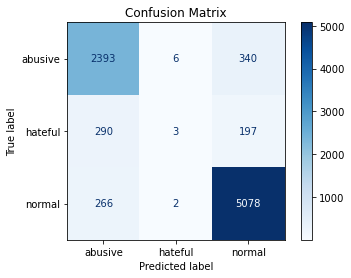

In [107]:
# Compute confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_day10,pred,display_labels=category,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")

# A/H Logistic Regression Models F1 Score Comparison

In [108]:
ah_lr_f1_plot['LR 1 Day Train'] = lr_1day_f1

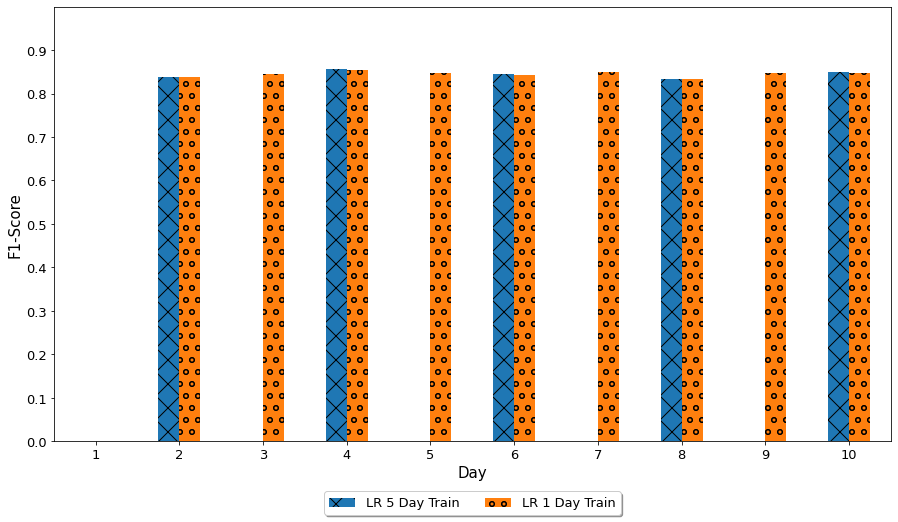

In [109]:
ax = ah_lr_f1_plot.plot(kind="bar",figsize=(15, 8))

bars = ax.patches
hatches = ''.join(h*len(ah_lr_f1_plot) for h in 'xo')

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

plt.xlabel("Day", size=15)
plt.ylabel("F1-Score", size=15)
ticks_loc = np.arange(0, 1, step=.1)
plt.yticks(ticks_loc, fontsize=13)
plt.ylim([0,1])
plt.xticks(fontsize=13, rotation='horizontal')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),fancybox=True, shadow=True, ncol=5, fontsize=13)

# A/H All Models F1 Score Comparison

In [110]:
ah_f1_plot = pd.concat([ah_dt_f1_plot,ah_rfc_f1_plot,ah_lr_f1_plot],axis=1)

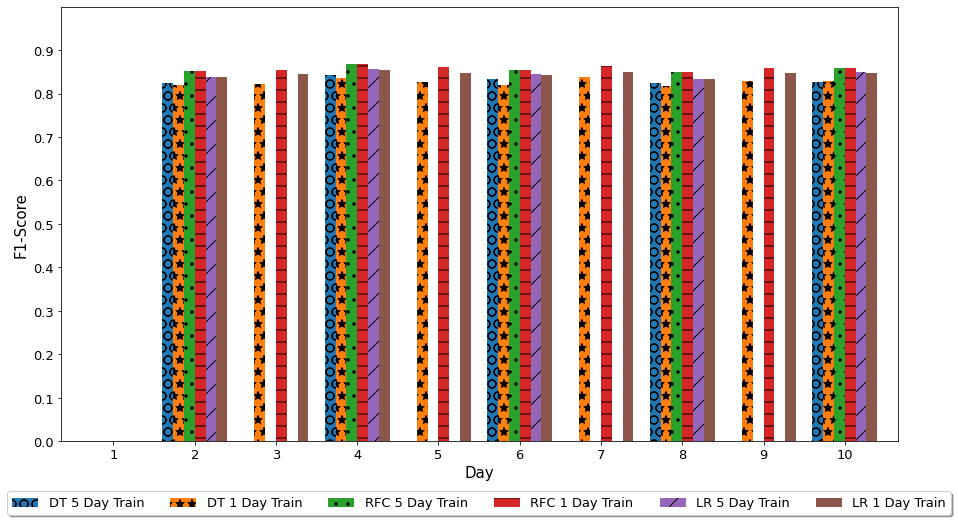

In [111]:
ax = ah_f1_plot.plot(kind="bar",figsize=(15, 8), width = .8)

bars = ax.patches
hatches = ''.join(h*len(ah_f1_plot) for h in 'O*.-/')

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

plt.xlabel("Day", size=15)
plt.ylabel("F1-Score", size=15)
ticks_loc = np.arange(0, 1, step=.1)
plt.yticks(ticks_loc, fontsize=13)
plt.ylim([0,1])
plt.xticks(fontsize=13, rotation='horizontal')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),fancybox=True, shadow=True, ncol=6, fontsize=13)

# Aggressive Tweets

In [112]:
#combine abusive and hateful tweets into aggressive for later comparison with other work
aggressive_tweets = tweets_copy
aggressive_tweets = aggressive_tweets.replace("abusive","aggressive")
aggressive_tweets = aggressive_tweets.replace("hateful","aggressive")
aggressive_tweets

,Tweet text,Label,@ count,Hashtag count,Retweet,Url count,Uppercase word count,Num sentences,Avg sentence len,Sentiment,Adjective count,Verb count,Adverb count,Profanity count,Avg word len
1,Man it would fucking rule if we had a party ...,aggressive,1,0,True,0,0,1,16.0,0.1280,1,3,0,1,4.266667
2,It is time to draw close to Him Father I draw...,normal,0,2,False,1,1,1,20.0,0.0000,0,4,3,0,3.294118
3,if you notice me start to act different or dis...,normal,0,0,False,0,0,1,35.0,0.0000,5,8,0,0,3.633333
4,Forget unfollowers I believe in growing new f...,normal,0,0,False,1,1,3,6.0,-0.1260,3,1,0,0,4.714286
5,Hate Being sexually Frustrated Like I wanna ...,aggressive,1,0,True,0,1,1,16.0,-0.8689,0,2,1,3,4.785714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,my fucking queen,aggressive,1,0,True,1,0,1,3.0,0.0000,0,0,0,1,4.666667
99992,treated with rebuild bone mass,normal,0,3,False,2,0,1,7.0,0.0000,0,1,0,0,5.200000
99993,why does my phone screen keeps flickring im s...,normal,1,4,False,0,0,1,29.0,-0.9430,4,4,2,1,3.576923
99994,vs but equally applies to any project,normal,0,3,False,2,0,1,8.0,0.0000,0,0,1,0,4.428571


In [113]:
#check to make sure only aggressive and normal tweet labels exist
pd.unique(aggressive_tweets['Label'])

array(['aggressive', 'normal'], dtype=object)

# Agg Data Preparation For Models

In [114]:
aggressive_tweets

,Tweet text,Label,@ count,Hashtag count,Retweet,Url count,Uppercase word count,Num sentences,Avg sentence len,Sentiment,Adjective count,Verb count,Adverb count,Profanity count,Avg word len
1,Man it would fucking rule if we had a party ...,aggressive,1,0,True,0,0,1,16.0,0.1280,1,3,0,1,4.266667
2,It is time to draw close to Him Father I draw...,normal,0,2,False,1,1,1,20.0,0.0000,0,4,3,0,3.294118
3,if you notice me start to act different or dis...,normal,0,0,False,0,0,1,35.0,0.0000,5,8,0,0,3.633333
4,Forget unfollowers I believe in growing new f...,normal,0,0,False,1,1,3,6.0,-0.1260,3,1,0,0,4.714286
5,Hate Being sexually Frustrated Like I wanna ...,aggressive,1,0,True,0,1,1,16.0,-0.8689,0,2,1,3,4.785714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,my fucking queen,aggressive,1,0,True,1,0,1,3.0,0.0000,0,0,0,1,4.666667
99992,treated with rebuild bone mass,normal,0,3,False,2,0,1,7.0,0.0000,0,1,0,0,5.200000
99993,why does my phone screen keeps flickring im s...,normal,1,4,False,0,0,1,29.0,-0.9430,4,4,2,1,3.576923
99994,vs but equally applies to any project,normal,0,3,False,2,0,1,8.0,0.0000,0,0,1,0,4.428571


In [115]:
aggressive_tweets.drop(aggressive_tweets.columns[[0]], axis=1, inplace=True)
category = encode_text_index(aggressive_tweets, "Label")
#'aggressive' tweets label = 0
#'normal' tweets label = 1
encode_numeric_zscore(aggressive_tweets, "@ count")
encode_numeric_zscore(aggressive_tweets, "Hashtag count")
encode_text_dummy(aggressive_tweets, "Retweet")
encode_numeric_zscore(aggressive_tweets, "Url count")
encode_numeric_zscore(aggressive_tweets, "Uppercase word count")
encode_numeric_zscore(aggressive_tweets, "Num sentences")
encode_numeric_zscore(aggressive_tweets, "Adjective count")
encode_numeric_zscore(aggressive_tweets, "Verb count")
encode_numeric_zscore(aggressive_tweets, "Adverb count")
encode_numeric_zscore(aggressive_tweets, "Profanity count")
encode_numeric_zscore(aggressive_tweets, "Avg sentence len")
encode_numeric_zscore(aggressive_tweets, "Avg word len")
aggressive_tweets

,Label,@ count,Hashtag count,Url count,Uppercase word count,Num sentences,Avg sentence len,Sentiment,Adjective count,Verb count,Adverb count,Profanity count,Avg word len,Retweet-False,Retweet-True
1,0,0.220582,-0.392741,-1.026551,-0.402188,-0.632783,0.426530,0.1280,-0.067988,0.163446,-0.696501,0.327584,-0.207162,0,1
2,1,-0.700879,0.862444,0.558705,-0.008264,-0.632783,1.044533,0.0000,-0.965360,0.695128,2.521878,-0.712615,-1.184764,1,0
3,1,-0.700879,-0.392741,-1.026551,-0.402188,-0.632783,3.362042,0.0000,3.521502,2.821852,-0.696501,-0.712615,-0.843786,1,0
4,1,-0.700879,-0.392741,0.558705,-0.008264,1.782263,-1.118476,-0.1260,1.726757,-0.899916,-0.696501,-0.712615,0.242782,1,0
5,0,0.220582,-0.392741,-1.026551,-0.008264,-0.632783,0.426530,-0.8689,-0.965360,-0.368235,0.376292,2.407981,0.314582,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,0,0.220582,-0.392741,0.558705,-0.402188,-0.632783,-1.581978,0.0000,-0.965360,-1.431597,-0.696501,0.327584,0.194916,0,1
99992,1,-0.700879,1.490037,2.143961,-0.402188,-0.632783,-0.963975,0.0000,-0.965360,-0.899916,-0.696501,-0.712615,0.731020,1,0
99993,1,0.220582,2.117630,-1.026551,-0.402188,-0.632783,2.435038,-0.9430,2.624130,0.695128,1.449085,0.327584,-0.900490,1,0
99994,1,-0.700879,1.490037,2.143961,-0.402188,-0.632783,-0.809475,0.0000,-0.965360,-1.431597,0.376292,-0.712615,-0.044416,1,0


# Agg Batch Model Creation

In [116]:
#split into 10 days of data based on original data collection time frame
agg_tweets_10_day_split = np.array_split(aggressive_tweets, 10)
agg_day1_tweets = agg_tweets_10_day_split[0]
agg_day2_tweets = agg_tweets_10_day_split[1]
agg_day3_tweets = agg_tweets_10_day_split[2]
agg_day4_tweets = agg_tweets_10_day_split[3]
agg_day5_tweets = agg_tweets_10_day_split[4]
agg_day6_tweets = agg_tweets_10_day_split[5]
agg_day7_tweets = agg_tweets_10_day_split[6]
agg_day8_tweets = agg_tweets_10_day_split[7]
agg_day9_tweets = agg_tweets_10_day_split[8]
agg_day10_tweets = agg_tweets_10_day_split[9]

# Agg Decision Tree Train Five Days AND Test Five Days

In [117]:
#day 1 tweets training
agg_dtc = tree.DecisionTreeClassifier()
agg_dtc.set_params(criterion='gini',splitter ='random',
        min_samples_split=4, min_samples_leaf=3)
agg_dtc_5day_f1 = []
agg_x_day1,agg_y_day1 = to_xy(agg_day1_tweets,'Label')
agg_dtc = agg_dtc.fit(agg_x_day1, agg_y_day1)
agg_dtc_5day_f1.append(0)

In [118]:
#day 2 tweets testing
agg_x_day2,agg_y_day2 = to_xy(agg_day2_tweets,'Label')
pred = agg_dtc.predict(agg_x_day2)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day2,axis=1)
agg_dtc_5day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      3236
           1       0.91      0.90      0.90      5340

    accuracy                           0.88      8576
   macro avg       0.87      0.87      0.87      8576
weighted avg       0.88      0.88      0.88      8576



In [119]:
#day 3 tweets training
agg_x_day3,agg_y_day3 = to_xy(agg_day3_tweets,'Label')
agg_dtc = agg_dtc.fit(agg_x_day3, agg_y_day3)
agg_dtc_5day_f1.append(0)

In [120]:
#day 4 tweets testing
agg_x_day4,agg_y_day4 = to_xy(agg_day4_tweets,'Label')
pred = agg_dtc.predict(agg_x_day4)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day4,axis=1)
agg_dtc_5day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      3183
           1       0.91      0.92      0.92      5393

    accuracy                           0.89      8576
   macro avg       0.89      0.89      0.89      8576
weighted avg       0.89      0.89      0.89      8576



In [121]:
#day 5 tweets training
agg_x_day5,agg_y_day5 = to_xy(agg_day5_tweets,'Label')
agg_dtc = agg_dtc.fit(agg_x_day5, agg_y_day5)
agg_dtc_5day_f1.append(0)

In [122]:
#day 6 tweets testing
agg_x_day6,agg_y_day6 = to_xy(agg_day6_tweets,'Label')
pred = agg_dtc.predict(agg_x_day6)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day6,axis=1)
agg_dtc_5day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      3162
           1       0.92      0.90      0.91      5413

    accuracy                           0.89      8575
   macro avg       0.88      0.88      0.88      8575
weighted avg       0.89      0.89      0.89      8575



In [123]:
#day 7 tweets training
agg_x_day7,agg_y_day7 = to_xy(agg_day7_tweets,'Label')
agg_dtc = agg_dtc.fit(agg_x_day7, agg_y_day7)
agg_dtc_5day_f1.append(0)

In [124]:
#day 8 tweets testing
agg_x_day8,agg_y_day8 = to_xy(agg_day8_tweets,'Label')
pred = agg_dtc.predict(agg_x_day8)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day8,axis=1)
agg_dtc_5day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      3275
           1       0.91      0.91      0.91      5300

    accuracy                           0.89      8575
   macro avg       0.88      0.88      0.88      8575
weighted avg       0.89      0.89      0.89      8575



In [125]:
#day 9 tweets training
agg_x_day9,agg_y_day9 = to_xy(agg_day9_tweets,'Label')
agg_dtc = agg_dtc.fit(agg_x_day9, agg_y_day9)
agg_dtc_5day_f1.append(0)

In [126]:
#day 10 tweets testing
agg_x_day10,agg_y_day10 = to_xy(agg_day10_tweets,'Label')
pred = agg_dtc.predict(agg_x_day10)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day10,axis=1)
agg_dtc_5day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      3229
           1       0.90      0.91      0.91      5346

    accuracy                           0.88      8575
   macro avg       0.87      0.87      0.87      8575
weighted avg       0.88      0.88      0.88      8575



Text(0.5, 1.0, 'Confusion Matrix')

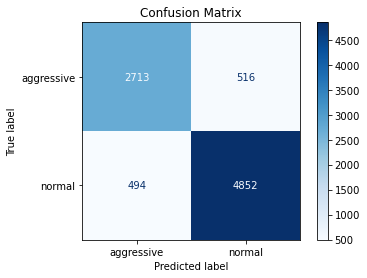

In [127]:
# Compute confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_true,pred,display_labels=category,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")

In [128]:
agg_dt_f1_plot = pd.DataFrame({"Agg DT 5 Day Train":agg_dtc_5day_f1},index=[1,2,3,4,5,6,7,8,9,10])

# Agg Decision Tree Train One Day AND Test The Rest

In [129]:
#day 1 tweets training
agg_dtc = tree.DecisionTreeClassifier()
agg_dtc.set_params(criterion='gini',splitter ='random',
        min_samples_split=4, min_samples_leaf=3)
agg_dtc_1day_f1 = []
agg_x_day1,agg_y_day1 = to_xy(agg_day1_tweets,'Label')
agg_dtc = agg_dtc.fit(agg_x_day1, agg_y_day1)
agg_dtc_1day_f1.append(0)

In [130]:
#day 2 tweets testing
agg_x_day2,agg_y_day2 = to_xy(agg_day2_tweets,'Label')
pred = agg_dtc.predict(agg_x_day2)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day2,axis=1)
agg_dtc_1day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      3236
           1       0.91      0.90      0.90      5340

    accuracy                           0.88      8576
   macro avg       0.87      0.87      0.87      8576
weighted avg       0.88      0.88      0.88      8576



In [131]:
#day 3 tweets testing
agg_x_day3,agg_y_day3 = to_xy(agg_day3_tweets,'Label')
pred = agg_dtc.predict(agg_x_day3)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day3,axis=1)
agg_dtc_1day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      3219
           1       0.91      0.90      0.91      5357

    accuracy                           0.88      8576
   macro avg       0.87      0.88      0.88      8576
weighted avg       0.88      0.88      0.88      8576



In [132]:
#day 4 tweets testing
agg_x_day4,agg_y_day4 = to_xy(agg_day4_tweets,'Label')
pred = agg_dtc.predict(agg_x_day4)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day4,axis=1)
agg_dtc_1day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      3183
           1       0.92      0.90      0.91      5393

    accuracy                           0.89      8576
   macro avg       0.88      0.89      0.88      8576
weighted avg       0.89      0.89      0.89      8576



In [133]:
#day 5 tweets testing
agg_x_day5,agg_y_day5 = to_xy(agg_day5_tweets,'Label')
pred = agg_dtc.predict(agg_x_day5)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day5,axis=1)
agg_dtc_1day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      3282
           1       0.92      0.91      0.91      5293

    accuracy                           0.89      8575
   macro avg       0.88      0.89      0.89      8575
weighted avg       0.89      0.89      0.89      8575



In [134]:
#day 6 tweets testing
agg_x_day6,agg_y_day6 = to_xy(agg_day6_tweets,'Label')
pred = agg_dtc.predict(agg_x_day6)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day6,axis=1)
agg_dtc_1day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      3162
           1       0.91      0.90      0.90      5413

    accuracy                           0.88      8575
   macro avg       0.87      0.87      0.87      8575
weighted avg       0.88      0.88      0.88      8575



In [135]:
#day 7 tweets testing
agg_x_day7,agg_y_day7 = to_xy(agg_day7_tweets,'Label')
pred = agg_dtc.predict(agg_x_day7)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day7,axis=1)
agg_dtc_1day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      3140
           1       0.91      0.90      0.91      5435

    accuracy                           0.88      8575
   macro avg       0.87      0.87      0.87      8575
weighted avg       0.88      0.88      0.88      8575



In [136]:
#day 8 tweets testing
agg_x_day8,agg_y_day8 = to_xy(agg_day8_tweets,'Label')
pred = agg_dtc.predict(agg_x_day8)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day8,axis=1)
agg_dtc_1day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      3275
           1       0.92      0.90      0.91      5300

    accuracy                           0.89      8575
   macro avg       0.88      0.88      0.88      8575
weighted avg       0.89      0.89      0.89      8575



In [137]:
#day 9 tweets testing
agg_x_day9,agg_y_day9 = to_xy(agg_day9_tweets,'Label')
pred = agg_dtc.predict(agg_x_day9)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day9,axis=1)
agg_dtc_1day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      3175
           1       0.91      0.90      0.91      5400

    accuracy                           0.88      8575
   macro avg       0.87      0.88      0.88      8575
weighted avg       0.88      0.88      0.88      8575



In [138]:
#day 10 tweets testing
agg_x_day10,agg_y_day10 = to_xy(agg_day10_tweets,'Label')
pred = agg_dtc.predict(agg_x_day10)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day10,axis=1)
agg_dtc_1day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      3229
           1       0.91      0.91      0.91      5346

    accuracy                           0.89      8575
   macro avg       0.88      0.88      0.88      8575
weighted avg       0.89      0.89      0.89      8575



Text(0.5, 1.0, 'Confusion Matrix')

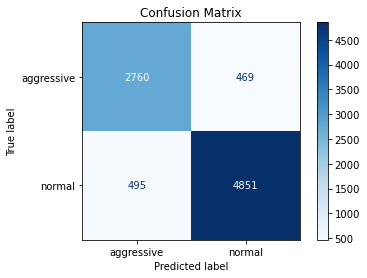

In [139]:
# Compute confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_true,pred,display_labels=category,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")

# Agg Decision Tree Models F1 Score Comparison

In [140]:
agg_dt_f1_plot['Agg DT 1 Day Train'] = agg_dtc_1day_f1

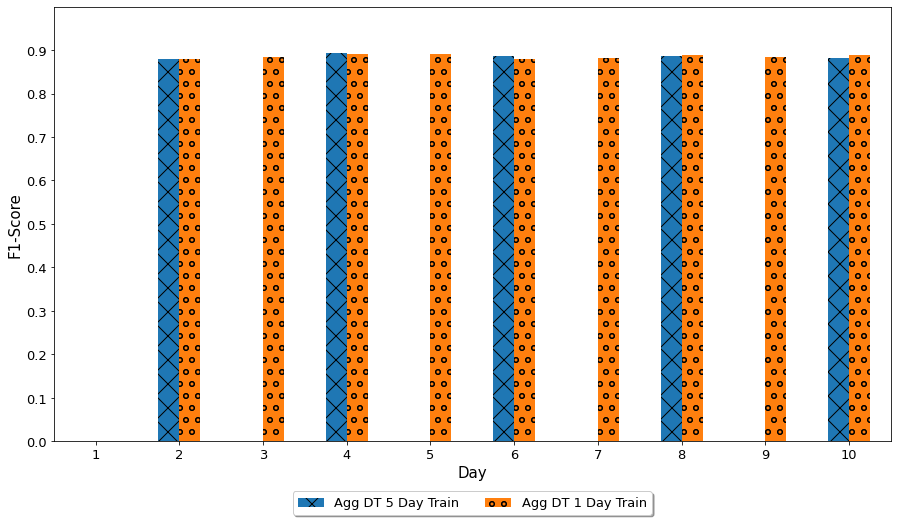

In [141]:
ax = agg_dt_f1_plot.plot(kind="bar",figsize=(15, 8))

bars = ax.patches
hatches = ''.join(h*len(agg_dt_f1_plot) for h in 'xo')

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

plt.xlabel("Day", size=15)
plt.ylabel("F1-Score", size=15)
ticks_loc = np.arange(0, 1, step=.1)
plt.yticks(ticks_loc, fontsize=13)
plt.ylim([0,1])
plt.xticks(fontsize=13, rotation='horizontal')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True,ncol=5, fontsize=13)

# Agg Random Forest Train Five Days AND Test Five Days

In [142]:
#day 1 tweets training
agg_rfc_5day_f1 = []
agg_rfc = RandomForestClassifier(criterion='gini',min_samples_leaf=1,min_samples_split=4,
                             n_estimators=100,verbose = 1, warm_start = True)
agg_rfc = agg_rfc.fit(agg_x_day1, agg_y_day1)
agg_rfc_5day_f1.append(0)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s


In [143]:
#day 2 tweets testing
pred = agg_rfc.predict(agg_x_day2)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day2,axis=1)
agg_rfc_5day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3236
           1       0.93      0.93      0.93      5340

    accuracy                           0.91      8576
   macro avg       0.91      0.91      0.91      8576
weighted avg       0.91      0.91      0.91      8576



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [144]:
#day 3 tweets training
agg_rfc = agg_rfc.fit(agg_x_day3, agg_y_day3)
agg_rfc_5day_f1.append(0)

c:\Users\aztec\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


In [145]:
#day 4 tweets testing
pred = agg_rfc.predict(agg_x_day4)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day4,axis=1)
agg_rfc_5day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3183
           1       0.94      0.93      0.94      5393

    accuracy                           0.92      8576
   macro avg       0.91      0.91      0.91      8576
weighted avg       0.92      0.92      0.92      8576



In [146]:
#day 5 tweets training
agg_rfc = agg_rfc.fit(agg_x_day5, agg_y_day5)
agg_rfc_5day_f1.append(0)

c:\Users\aztec\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


In [147]:
#day 6 tweets testing
pred = agg_rfc.predict(agg_x_day6)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day6,axis=1)
agg_rfc_5day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3162
           1       0.93      0.93      0.93      5413

    accuracy                           0.91      8575
   macro avg       0.90      0.90      0.90      8575
weighted avg       0.91      0.91      0.91      8575



In [148]:
#day 7 tweets training
agg_rfc = agg_rfc.fit(agg_x_day7, agg_y_day7)
agg_rfc_5day_f1.append(0)

c:\Users\aztec\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


In [149]:
#day 8 tweets testing
pred = agg_rfc.predict(agg_x_day8)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day8,axis=1)
agg_rfc_5day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.89      0.88      0.88      3275
           1       0.93      0.93      0.93      5300

    accuracy                           0.91      8575
   macro avg       0.91      0.91      0.91      8575
weighted avg       0.91      0.91      0.91      8575



In [150]:
#day 9 tweets training
agg_rfc = agg_rfc.fit(agg_x_day9, agg_y_day9)
agg_rfc_5day_f1.append(0)

c:\Users\aztec\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:435: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


In [151]:
#day 10 tweets testing
pred = agg_rfc.predict(agg_x_day10)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day10,axis=1)
agg_rfc_5day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      3229
           1       0.93      0.93      0.93      5346

    accuracy                           0.91      8575
   macro avg       0.91      0.91      0.91      8575
weighted avg       0.91      0.91      0.91      8575



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Text(0.5, 1.0, 'Confusion Matrix')

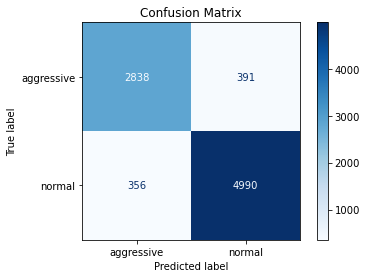

In [152]:
# Compute confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_true,pred,display_labels=category,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")

In [153]:
agg_rfc_f1_plot = pd.DataFrame({"Agg RFC 5 Day Train":agg_rfc_5day_f1},index=[1,2,3,4,5,6,7,8,9,10])

# Agg Random Forest Train One Day AND Test The Rest

In [154]:
#day 1 tweets training
agg_rfc_1day_f1 = []
agg_rfc = RandomForestClassifier(criterion='gini',min_samples_leaf=1,min_samples_split=4,
                             n_estimators=100,verbose = 1, warm_start = True)
agg_rfc = agg_rfc.fit(agg_x_day1, agg_y_day1)
agg_rfc_1day_f1.append(0)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s


In [155]:
#day 2 tweets testing
pred = agg_rfc.predict(agg_x_day2)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day2,axis=1)
agg_rfc_1day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3236
           1       0.93      0.93      0.93      5340

    accuracy                           0.91      8576
   macro avg       0.90      0.90      0.90      8576
weighted avg       0.91      0.91      0.91      8576



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [156]:
#day 3 tweets testing
pred = agg_rfc.predict(agg_x_day3)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day3,axis=1)
agg_rfc_1day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.87      0.88      0.88      3219
           1       0.93      0.92      0.93      5357

    accuracy                           0.91      8576
   macro avg       0.90      0.90      0.90      8576
weighted avg       0.91      0.91      0.91      8576



In [157]:
#day 4 tweets testing
pred = agg_rfc.predict(agg_x_day4)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day4,axis=1)
agg_rfc_1day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.89      0.90      0.89      3183
           1       0.94      0.93      0.94      5393

    accuracy                           0.92      8576
   macro avg       0.91      0.92      0.92      8576
weighted avg       0.92      0.92      0.92      8576



In [158]:
#day 5 tweets testing
pred = agg_rfc.predict(agg_x_day5)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day5,axis=1)
agg_rfc_1day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3282
           1       0.93      0.93      0.93      5293

    accuracy                           0.92      8575
   macro avg       0.91      0.91      0.91      8575
weighted avg       0.92      0.92      0.92      8575



In [159]:
#day 6 tweets testing
pred = agg_rfc.predict(agg_x_day6)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day6,axis=1)
agg_rfc_1day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3162
           1       0.93      0.93      0.93      5413

    accuracy                           0.91      8575
   macro avg       0.90      0.90      0.90      8575
weighted avg       0.91      0.91      0.91      8575



In [160]:
#day 7 tweets testing
pred = agg_rfc.predict(agg_x_day7)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day7,axis=1)
agg_rfc_1day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      3140
           1       0.94      0.93      0.94      5435

    accuracy                           0.92      8575
   macro avg       0.91      0.91      0.91      8575
weighted avg       0.92      0.92      0.92      8575



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [161]:
#day 8 tweets testing
pred = agg_rfc.predict(agg_x_day8)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day8,axis=1)
agg_rfc_1day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.89      0.88      0.89      3275
           1       0.93      0.93      0.93      5300

    accuracy                           0.91      8575
   macro avg       0.91      0.91      0.91      8575
weighted avg       0.91      0.91      0.91      8575



In [162]:
#day 9 tweets testing
pred = agg_rfc.predict(agg_x_day9)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day9,axis=1)
agg_rfc_1day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3175
           1       0.93      0.93      0.93      5400

    accuracy                           0.91      8575
   macro avg       0.91      0.91      0.91      8575
weighted avg       0.91      0.91      0.91      8575



In [163]:
#day 10 tweets testing
pred = agg_rfc.predict(agg_x_day10)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(agg_y_day10,axis=1)
agg_rfc_1day_f1.append(f1_score(y_true,pred,average='weighted'))
print(metrics.classification_report(y_true, pred))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.89      0.88      0.89      3229
           1       0.93      0.93      0.93      5346

    accuracy                           0.91      8575
   macro avg       0.91      0.91      0.91      8575
weighted avg       0.91      0.91      0.91      8575



Text(0.5, 1.0, 'Confusion Matrix')

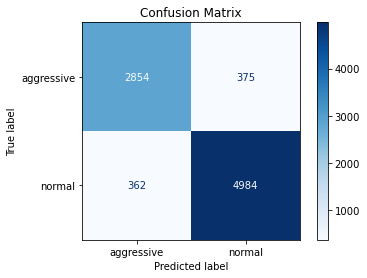

In [164]:
# Compute confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_true,pred,display_labels=category,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")

# Agg Random Forest Models F1 Score Comparison

In [165]:
agg_rfc_f1_plot['Agg RFC 1 Day Train'] = agg_rfc_1day_f1

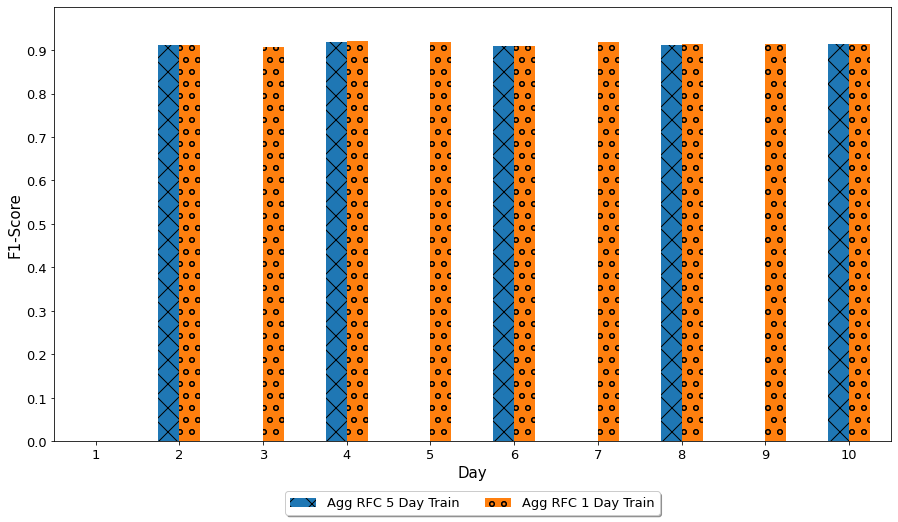

In [166]:
ax = agg_rfc_f1_plot.plot(kind="bar",figsize=(15, 8))

bars = ax.patches
hatches = ''.join(h*len(agg_rfc_f1_plot) for h in 'xo')

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

plt.xlabel("Day", size=15)
plt.ylabel("F1-Score", size=15)
ticks_loc = np.arange(0, 1, step=.1)
plt.yticks(ticks_loc, fontsize=13)
plt.ylim([0,1])
plt.xticks(fontsize=13, rotation='horizontal')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),fancybox=True, shadow=True, ncol=5, fontsize=13)

# Agg Logistic Regression Train Five Days AND Test Five Days

In [167]:
#day 1 tweets training
agg_x_day1,agg_y_day1 = to_xy(agg_day1_tweets,'Label')
agg_y_day1 = agg_day1_tweets["Label"].values
agg_lr_5day_f1 = []
agg_lr = LogisticRegression(max_iter=150, multi_class="multinomial",
                        penalty=None, solver = "saga", verbose = 0, warm_start = True)
agg_lr = agg_lr.fit(agg_x_day1, agg_y_day1)
agg_lr_5day_f1.append(0)

c:\Users\aztec\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [168]:
#day 2 tweets testing
agg_x_day2,agg_y_day2 = to_xy(agg_day2_tweets,'Label')
agg_y_day2 = agg_day2_tweets["Label"].values
pred = agg_lr.predict(agg_x_day2)
agg_lr_5day_f1.append(f1_score(agg_y_day2,pred,average='weighted'))
print(metrics.classification_report(agg_y_day2, pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      3236
           1       0.92      0.94      0.93      5340

    accuracy                           0.91      8576
   macro avg       0.90      0.90      0.90      8576
weighted avg       0.91      0.91      0.91      8576



In [169]:
#day 3 tweets training
agg_x_day3,agg_y_day3 = to_xy(agg_day3_tweets,'Label')
agg_y_day3 = agg_day3_tweets["Label"].values
agg_lr = agg_lr.fit(agg_x_day3, agg_y_day3)
agg_lr_5day_f1.append(0)

In [170]:
#day 4 tweets testing
agg_x_day4,agg_y_day4 = to_xy(agg_day4_tweets,'Label')
agg_y_day4 = agg_day4_tweets["Label"].values
pred = agg_lr.predict(agg_x_day4)
agg_lr_5day_f1.append(f1_score(agg_y_day4,pred,average='weighted'))
print(metrics.classification_report(agg_y_day4, pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      3183
           1       0.93      0.94      0.93      5393

    accuracy                           0.92      8576
   macro avg       0.91      0.91      0.91      8576
weighted avg       0.92      0.92      0.92      8576



In [171]:
#day 5 tweets training
agg_x_day5,agg_y_day5 = to_xy(agg_day5_tweets,'Label')
agg_y_day5 = agg_day5_tweets["Label"].values
agg_lr = agg_lr.fit(agg_x_day5, agg_y_day5)
agg_lr_5day_f1.append(0)

In [172]:
#day 6 tweets testing
agg_x_day6,agg_y_day6 = to_xy(agg_day6_tweets,'Label')
agg_y_day6 = agg_day6_tweets["Label"].values
pred = agg_lr.predict(agg_x_day6)
agg_lr_5day_f1.append(f1_score(agg_y_day6,pred,average='weighted'))
print(metrics.classification_report(agg_y_day6, pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      3162
           1       0.92      0.94      0.93      5413

    accuracy                           0.91      8575
   macro avg       0.90      0.90      0.90      8575
weighted avg       0.91      0.91      0.91      8575



In [173]:
#day 7 tweets training
agg_x_day7,agg_y_day7 = to_xy(agg_day7_tweets,'Label')
agg_y_day7 = agg_day7_tweets["Label"].values
agg_lr = agg_lr.fit(agg_x_day7, agg_y_day7)
agg_lr_5day_f1.append(0)

In [174]:
#day 8 tweets testing
agg_x_day8,agg_y_day8 = to_xy(agg_day8_tweets,'Label')
agg_y_day8 = agg_day8_tweets["Label"].values
pred = agg_lr.predict(agg_x_day8)
agg_lr_5day_f1.append(f1_score(agg_y_day8,pred,average='weighted'))
print(metrics.classification_report(agg_y_day8, pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      3275
           1       0.91      0.94      0.93      5300

    accuracy                           0.91      8575
   macro avg       0.90      0.90      0.90      8575
weighted avg       0.91      0.91      0.91      8575



In [175]:
#day 9 tweets training
agg_x_day9,agg_y_day9 = to_xy(agg_day9_tweets,'Label')
agg_y_day9 = agg_day9_tweets["Label"].values
agg_lr = agg_lr.fit(agg_x_day9, agg_y_day9)
agg_lr_5day_f1.append(0)

In [176]:
#day 10 tweets testing
agg_x_day10,agg_y_day10 = to_xy(agg_day10_tweets,'Label')
agg_y_day10 = agg_day10_tweets["Label"].values
pred = agg_lr.predict(agg_x_day10)
agg_lr_5day_f1.append(f1_score(agg_y_day10,pred,average='weighted'))
print(metrics.classification_report(agg_y_day10, pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      3229
           1       0.92      0.94      0.93      5346

    accuracy                           0.91      8575
   macro avg       0.91      0.90      0.90      8575
weighted avg       0.91      0.91      0.91      8575



Text(0.5, 1.0, 'Confusion Matrix')

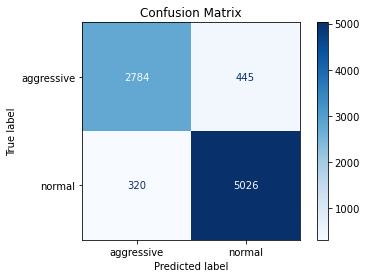

In [177]:
# Compute confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(agg_y_day10,pred,display_labels=category,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")

In [178]:
agg_lr_f1_plot = pd.DataFrame({"Agg LR 5 Day Train":agg_lr_5day_f1},index=[1,2,3,4,5,6,7,8,9,10])

# Agg Logistic Regression Train One Day AND Test The Rest

In [179]:
#day 1 tweets training
agg_x_day1,agg_y_day1 = to_xy(agg_day1_tweets,'Label')
agg_y_day1 = agg_day1_tweets["Label"].values
agg_lr_1day_f1 = []
agg_lr = LogisticRegression(max_iter=150, multi_class="multinomial",
                        penalty=None, solver = "saga", verbose = 0, warm_start = True)
agg_lr = agg_lr.fit(agg_x_day1, agg_y_day1)
agg_lr_1day_f1.append(0)

c:\Users\aztec\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [180]:
#day 2 tweets testing
agg_x_day2,agg_y_day2 = to_xy(agg_day2_tweets,'Label')
agg_y_day2 = agg_day2_tweets["Label"].values
pred = agg_lr.predict(agg_x_day2)
agg_lr_1day_f1.append(f1_score(agg_y_day2,pred,average='weighted'))
print(metrics.classification_report(agg_y_day2, pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      3236
           1       0.92      0.94      0.93      5340

    accuracy                           0.91      8576
   macro avg       0.90      0.90      0.90      8576
weighted avg       0.91      0.91      0.91      8576



In [181]:
#day 3 tweets testing
agg_x_day3,agg_y_day3 = to_xy(agg_day3_tweets,'Label')
agg_y_day3 = agg_day3_tweets["Label"].values
pred = agg_lr.predict(agg_x_day3)
agg_lr_1day_f1.append(f1_score(agg_y_day3,pred,average='weighted'))
print(metrics.classification_report(agg_y_day3, pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      3219
           1       0.92      0.93      0.92      5357

    accuracy                           0.90      8576
   macro avg       0.90      0.90      0.90      8576
weighted avg       0.90      0.90      0.90      8576



In [182]:
#day 4 tweets testing
agg_x_day4,agg_y_day4 = to_xy(agg_day4_tweets,'Label')
agg_y_day4 = agg_day4_tweets["Label"].values
pred = agg_lr.predict(agg_x_day4)
agg_lr_1day_f1.append(f1_score(agg_y_day4,pred,average='weighted'))
print(metrics.classification_report(agg_y_day4, pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      3183
           1       0.93      0.94      0.93      5393

    accuracy                           0.91      8576
   macro avg       0.91      0.91      0.91      8576
weighted avg       0.91      0.91      0.91      8576



In [183]:
#day 5 tweets testing
agg_x_day5,agg_y_day5 = to_xy(agg_day5_tweets,'Label')
agg_y_day5 = agg_day5_tweets["Label"].values
pred = agg_lr.predict(agg_x_day5)
agg_lr_1day_f1.append(f1_score(agg_y_day5,pred,average='weighted'))
print(metrics.classification_report(agg_y_day5, pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      3282
           1       0.92      0.94      0.93      5293

    accuracy                           0.91      8575
   macro avg       0.91      0.91      0.91      8575
weighted avg       0.91      0.91      0.91      8575



In [184]:
#day 6 tweets testing
agg_x_day6,agg_y_day6 = to_xy(agg_day6_tweets,'Label')
agg_y_day6 = agg_day6_tweets["Label"].values
pred = agg_lr.predict(agg_x_day6)
agg_lr_1day_f1.append(f1_score(agg_y_day6,pred,average='weighted'))
print(metrics.classification_report(agg_y_day6, pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      3162
           1       0.92      0.94      0.93      5413

    accuracy                           0.91      8575
   macro avg       0.90      0.90      0.90      8575
weighted avg       0.91      0.91      0.91      8575



In [185]:
#day 7 tweets testing
agg_x_day7,agg_y_day7 = to_xy(agg_day7_tweets,'Label')
agg_y_day7 = agg_day7_tweets["Label"].values
pred = agg_lr.predict(agg_x_day7)
agg_lr_1day_f1.append(f1_score(agg_y_day7,pred,average='weighted'))
print(metrics.classification_report(agg_y_day7, pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      3140
           1       0.92      0.94      0.93      5435

    accuracy                           0.91      8575
   macro avg       0.91      0.90      0.90      8575
weighted avg       0.91      0.91      0.91      8575



In [186]:
#day 8 tweets testing
agg_x_day8,agg_y_day8 = to_xy(agg_day8_tweets,'Label')
agg_y_day8 = agg_day8_tweets["Label"].values
pred = agg_lr.predict(agg_x_day8)
agg_lr_1day_f1.append(f1_score(agg_y_day8,pred,average='weighted'))
print(metrics.classification_report(agg_y_day8, pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      3275
           1       0.91      0.94      0.93      5300

    accuracy                           0.91      8575
   macro avg       0.90      0.90      0.90      8575
weighted avg       0.91      0.91      0.91      8575



In [187]:
#day 9 tweets testing
agg_x_day9,agg_y_day9 = to_xy(agg_day9_tweets,'Label')
agg_y_day9 = agg_day9_tweets["Label"].values
pred = agg_lr.predict(agg_x_day9)
agg_lr_1day_f1.append(f1_score(agg_y_day9,pred,average='weighted'))
print(metrics.classification_report(agg_y_day9, pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      3175
           1       0.92      0.94      0.93      5400

    accuracy                           0.91      8575
   macro avg       0.91      0.90      0.91      8575
weighted avg       0.91      0.91      0.91      8575



In [188]:
#day 10 tweets testing
agg_x_day10,agg_y_day10 = to_xy(agg_day10_tweets,'Label')
agg_y_day10 = agg_day10_tweets["Label"].values
pred = agg_lr.predict(agg_x_day10)
agg_lr_1day_f1.append(f1_score(agg_y_day10,pred,average='weighted'))
print(metrics.classification_report(agg_y_day10, pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      3229
           1       0.92      0.94      0.93      5346

    accuracy                           0.91      8575
   macro avg       0.91      0.90      0.90      8575
weighted avg       0.91      0.91      0.91      8575



Text(0.5, 1.0, 'Confusion Matrix')

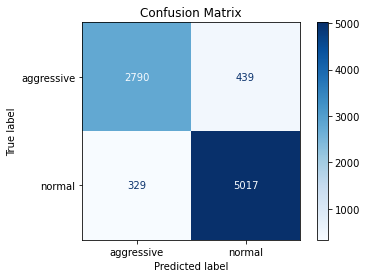

In [189]:
# Compute confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(agg_y_day10,pred,display_labels=category,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")

# Agg Logistic Regression Models F1 Score Comparison

In [190]:
agg_lr_f1_plot['Agg LR 1 Day Train'] = agg_lr_1day_f1

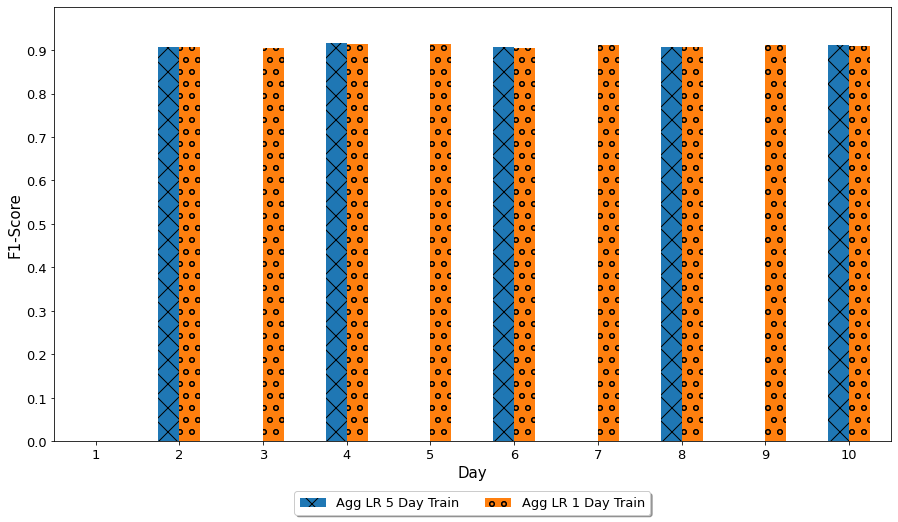

In [191]:
ax = agg_lr_f1_plot.plot(kind="bar",figsize=(15, 8))

bars = ax.patches
hatches = ''.join(h*len(agg_lr_f1_plot) for h in 'xo')

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

plt.xlabel("Day", size=15)
plt.ylabel("F1-Score", size=15)
ticks_loc = np.arange(0, 1, step=.1)
plt.yticks(ticks_loc, fontsize=13)
plt.ylim([0,1])
plt.xticks(fontsize=13, rotation='horizontal')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),fancybox=True, shadow=True, ncol=5, fontsize=13)

# Agg All Models F1 Score Comparison

In [192]:
agg_f1_plot = pd.concat([agg_dt_f1_plot,agg_rfc_f1_plot,agg_lr_f1_plot],axis=1)

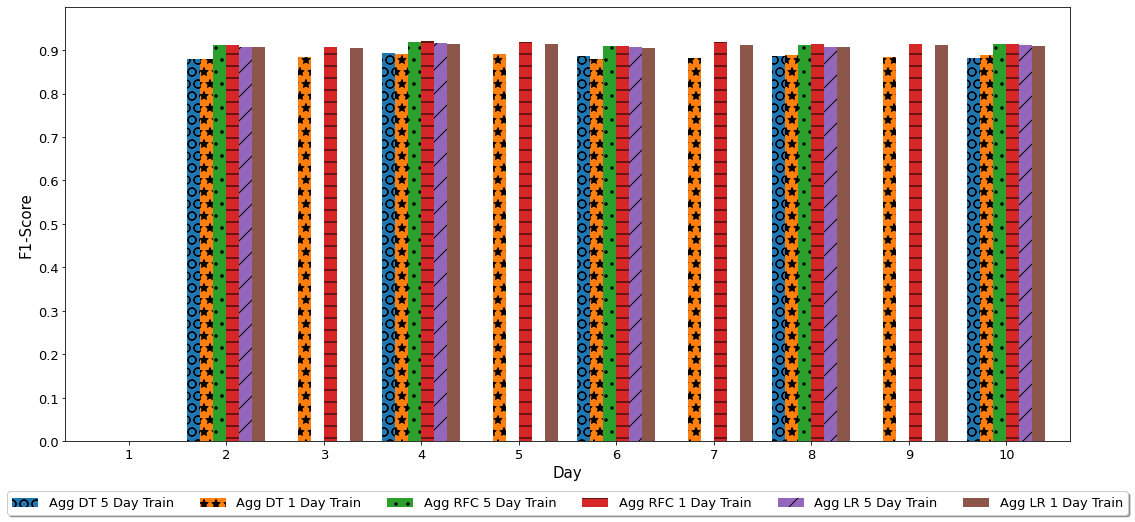

In [193]:
ax = agg_f1_plot.plot(kind="bar",figsize=(18, 8), width = .8)

bars = ax.patches
hatches = ''.join(h*len(agg_f1_plot) for h in 'O*.-/')

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

plt.xlabel("Day", size=15)
plt.ylabel("F1-Score", size=15)
ticks_loc = np.arange(0, 1, step=.1)
plt.yticks(ticks_loc, fontsize=13)
plt.ylim([0,1])
plt.xticks(fontsize=13,rotation='horizontal')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=6, fontsize=13)

# Gini Importance

In [194]:
# Print the feature importances
feature_importances = gini_model.feature_importances_
print(feature_importances)

[0.0281014  0.01773757 0.02147829 0.02393448 0.02069244 0.07773185
 0.12720893 0.03081181 0.03366906 0.02305742 0.34858727 0.0698066
 0.08678563 0.09039724]


c:\Users\aztec\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

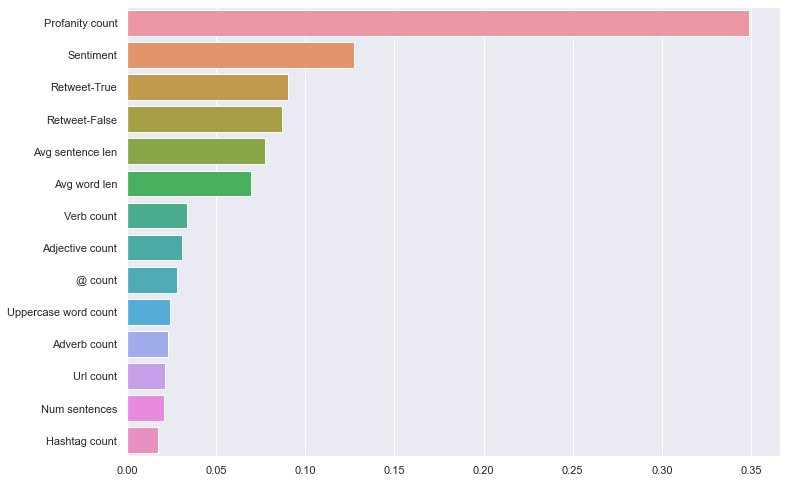

In [195]:
# Sort the feature importances from greatest to least using the sorted indices
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = tweets.columns[1:][sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a bar plot of the feature importances
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(sorted_importances, sorted_feature_names)